# Figures for the giant number fluctuations project (DF)

## General guidelines

- This notebook contains finalized code for making the figures in the giant number fluctuations paper. This notebook contains code for two purposes:
    - summarizing code: summarizes batch data into a more condensed form
    - plotting: read data from data_summary spreadsheet, and plot the data (the sheet should locate in Google Drive\corresponding research project folder\data\data_summary.xlsx).
- Figure organization
    - Figures will be organized under corresponding sections (h2 title). 
    - Subfigures (panels) will be under subsections (h3 title). 
    - Each subsection should be self-complete, meaning that to plot a certain figure, only the code in that specific section needs to be run, except importing packages (which should always be the first thing to run when starting the notebook.
- Ideas and plans that haven't been implemented should be listed in the **Plans** block, in <font color='blue'>blue color</font>.
- While notebooks for each specific figure is still kept in this directory, they are used mainly for drafting figures, testing code and trying out ideas. Once a figure is finalized, copy the corresponding code to this notebook.

## <font color='blue'> Plans

<font color='blue'>
    
- Modify data_master_dir to be a more specific directory, since this notebook, or notebooks for other projects in the future will be only for the specific project and the data will all be saved in a [project]/data folder. Direct to the data folder would be more desirable. (apply for all notebooks)
</font>

## Table of contents

- Figure 1: experimental setup and images
    - (a) low concentration
    - (b) low concentration with PIV overlay
    - (c) high concentration
    - (d) high concentration with PIV overlay
    - (e) use data from August to draw new image and PIV
- Figure 2: spatial correlation functions and correlation lengths
    - (a) velocity correlation
    - (b) concentration correlation
    - (c) correlation length
    - (d) ratio between two correlation lengths
- Figure 3: concentration dependence of $\alpha$
    - (a) standard deviation at various subsystem sizes
    - (b) concentration dependence of $\alpha$
    - (c) concentration dependence of energy $E$
    - (d) concentration dependence of $OP$
    - (e) plot $\alpha$ and $E$ on the same axis
- Figure 4: evolution
    - (a) standard deviation during the onset of active turbulence
    - (b) temporal evolution of $\alpha$, $E$ and $OP$
- Figure 5: local correlations between concentration fluctuations and flow energy - microscopic origin
    - (a) Calculation illustration
        - Starting from a image stack
        - branch into coarse-grained image and PIV
        - calculate E and LDF from the two branches
        - calculate cross-correlation
    - (b) Correlation as a function of volume fraction
- Figure 6: dimensionality effect
    - $\alpha$ and $E$ at different gap thickness (twinx)
- Figure 7: $\alpha$ as a function of $E$
- Figure 8: energy spectrum analysis
    - (a) energy spectrum at various concentrations
    - (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations
        - variation 1: $\alpha$ and $\beta$ as functions of volume fractions $\phi$
        - variation 2: $\alpha$ vs. $\beta$
        - variation 3: $\beta$ vs. $\phi$
    - (c) Energy $E$ and GNF $\Delta N/\sqrt N$ matching at all length scales
        - steady state 
        - transient state
    - (d) energy density at the limit k -> 0 (compare with simulation in [Bardfalvy 2019](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract))

## Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from myImageLib import wowcolor, bestcolor
import numpy as np
import os
from corrLib import readdata
from corr_utils import *
from scipy.signal import savgol_filter
import typesetting.main as tm
from IPython.display import clear_output
from matplotlib.patches import Rectangle
import cv2
from pivLib import PIV1
import matplotlib
from scipy.special import kn
from scipy import signal
from log import experiment_log

<font color='red'>**CHECK AND RUN THE BLOCK BELOW TO INITIATE ESSENTIAL VARIABLES**</font>

In [2]:
color_dict, marker_list = unified_symbols() # keep color and symbol consistent across different plot, for same concentrations
data_master_dir = r'E:\Google Drive' # data folder: Google drive for now, but may change in the future
tm.prl('1-column-2-panel') # control the default plotting configurations, now I realize the parameters should vary from plot to plot
dirs = data_log_mapping(kw='aug') # video info for GNF raw data, obtained from Aug 3rd to Aug 6th
log_df = experiment_log()
n0_to_vf = 0.08

-------The log looks OK!--------


## Figure 1: experimental setup and images

### (a) high concentration

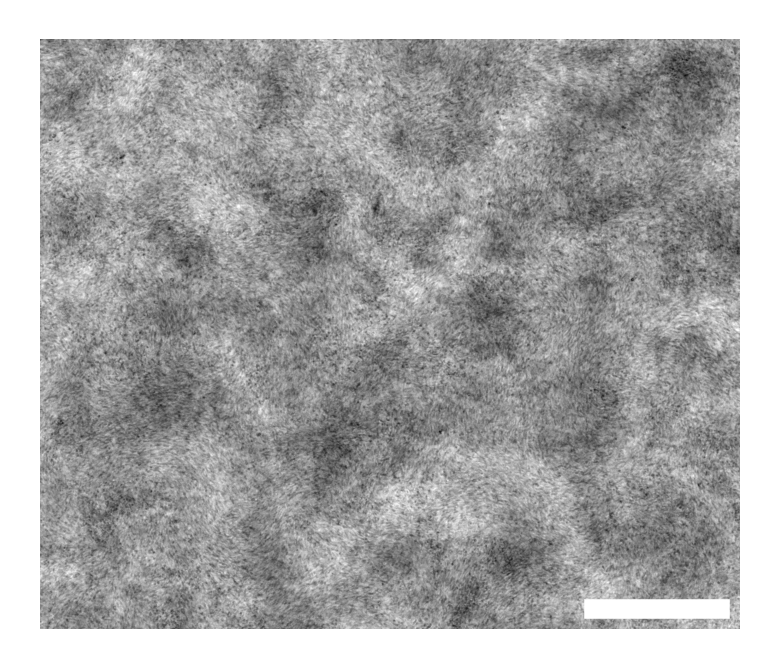

In [29]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3001.tif'))
h, w = img.shape
fig = plt.figure(figsize=(1.75, 1.75*h/w))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray', vmin=130, vmax=170)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

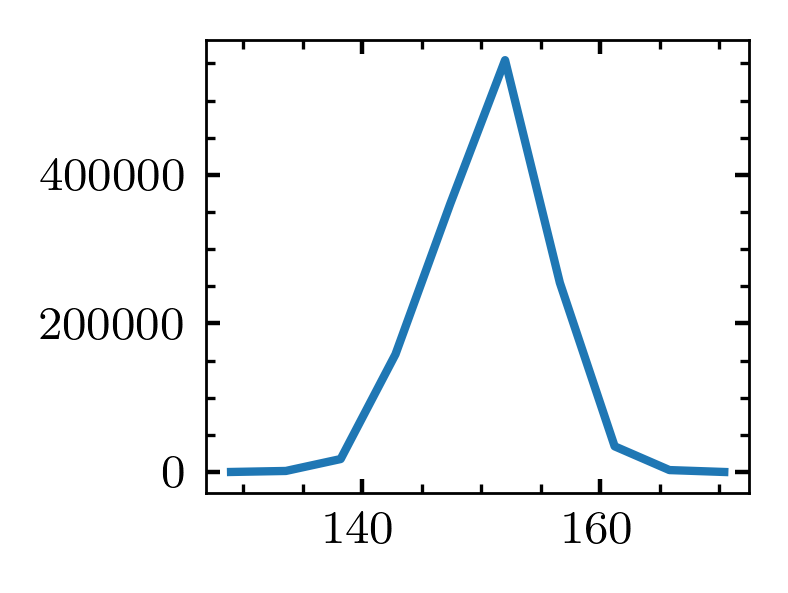

In [22]:
hist, b = np.histogram(img)
plt.plot(b[:-1], hist)

### (b) low concentration with PIV overlay

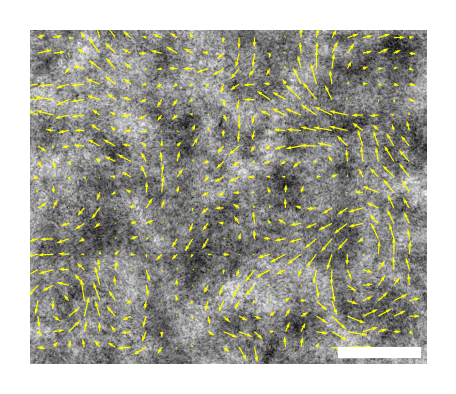

In [18]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3000.tif'))
pivData = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3000.csv'))
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
h, w = img.shape
wf = 1.57
hf = h / w * wf

fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, sparcified_pivData.v, color='yellow', width=0.003)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

# output_folder = r'E:\Github\GNF-paper\V_1\Figures\fig-1'
# fig.savefig(os.path.join(output_folder, 'v3c.pdf'))

### (c) high concentration

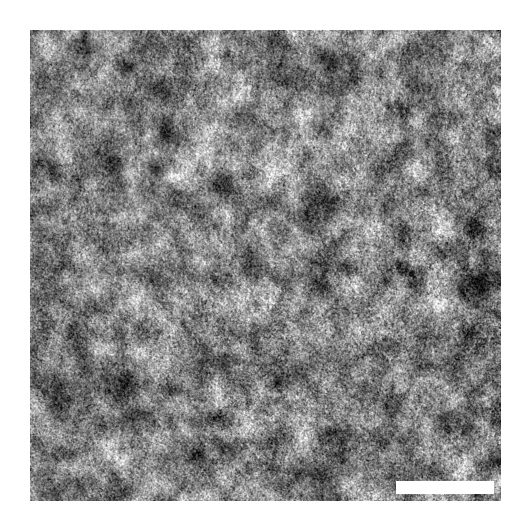

In [6]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\raw\80-900.tif'))
h, w = img.shape
wf = 1.57
hf = h / w * wf
fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)
# fig.savefig(os.path.join(output_folder, '80_raw.png'))

### (d) high concentration with PIV overlay

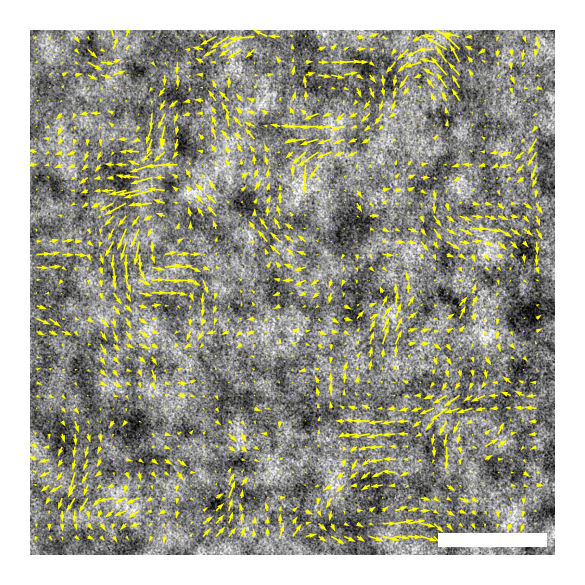

In [7]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\experiment\raw\80-900.tif')
pivData = pd.read_csv(r'E:\Google Drive\Research projects\DF\Figures\experiment\raw\80-900-piv.csv')
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
fig = plt.figure(figsize=(1.75, 1.75), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, sparcified_pivData.v, color='yellow', width=0.003)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

output_folder = r'E:\Github\GNF-paper\V_1\Figures\fig-1'
fig.savefig(os.path.join(output_folder, 'v3b.pdf'))

### (e) Use a different data for image and PIV

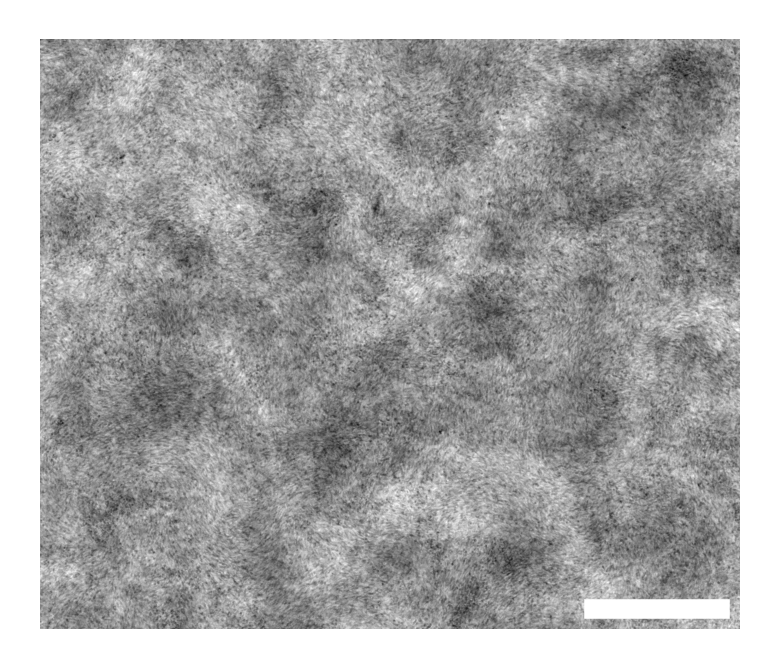

In [40]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3001.tif'))
output_folder = os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment')
h, w = img.shape
fig = plt.figure(figsize=(1.75, 1.75*h/w))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray', vmin=130, vmax=170)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)
fig.savefig(os.path.join(output_folder, '80_raw.pdf'))

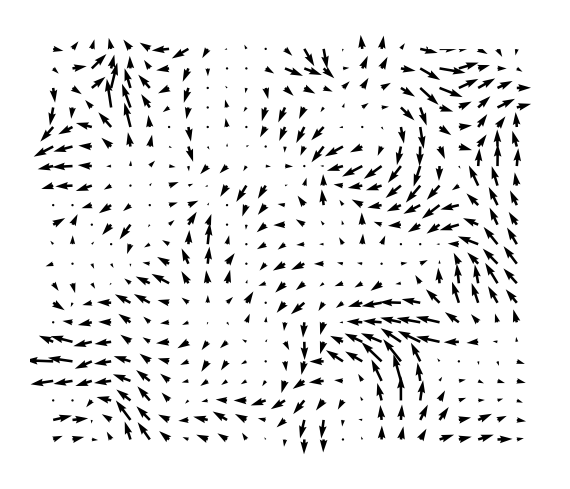

In [11]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3000.tif'))
output_folder = os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment')
pivData = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\80-01-3000.csv'))
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
h, w = img.shape
wf = 1.7
hf = h / w * wf
fig = plt.figure(figsize=(wf, hf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
# ax.imshow(img, cmap='gray')
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, sparcified_pivData.v, color='black', width=0.005)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)
fig.savefig(os.path.join(output_folder, '80_piv.pdf'))

### (f) Intensity-concentration calibration

In [6]:
cali_data

n           I       std
0  20  100.354925  0.953345
1  30   95.970959  1.282410
2  40   92.134630  0.242169
3  50   88.064606  0.728168
4  60   82.108535  0.602913
5  70   71.146193  0.436338
6  80   66.723858  1.200602
7  90   62.484448  0.787372

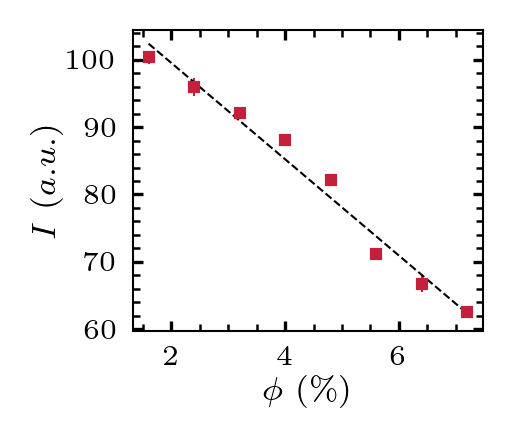

In [7]:
cali_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\n-I-calibration.csv'))
fig, ax = plt.subplots(figsize=(1.75, 1.50), dpi=300)
cali_data['I'] = cali_data['I'] / 2**11 * 2**8
cali_data['std'] = cali_data['std'] / 2**11 * 2**8
ax.errorbar(cali_data['n'] * n0_to_vf, cali_data['I'], yerr=cali_data['std'], ls='', 
            c=wowcolor(0), marker='s',  capsize=0, markersize=2, elinewidth=0.5)
p = np.polyfit(cali_data['n'] * n0_to_vf, cali_data['I'] , deg=1)
ax.plot(cali_data['n'] * n0_to_vf, p[0]*cali_data['n']*n0_to_vf+p[1], ls='--', color='black', lw=0.5)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$I$ ($a.u.$)')
# ax.set_xticks([2, 4, 6, 8, 10])
# ax.set_yticks([500, 600, 700, 800])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\\calibration-plot.pdf'))

### Dilute suspension image

In [5]:
img.shape

(1080, 1282)

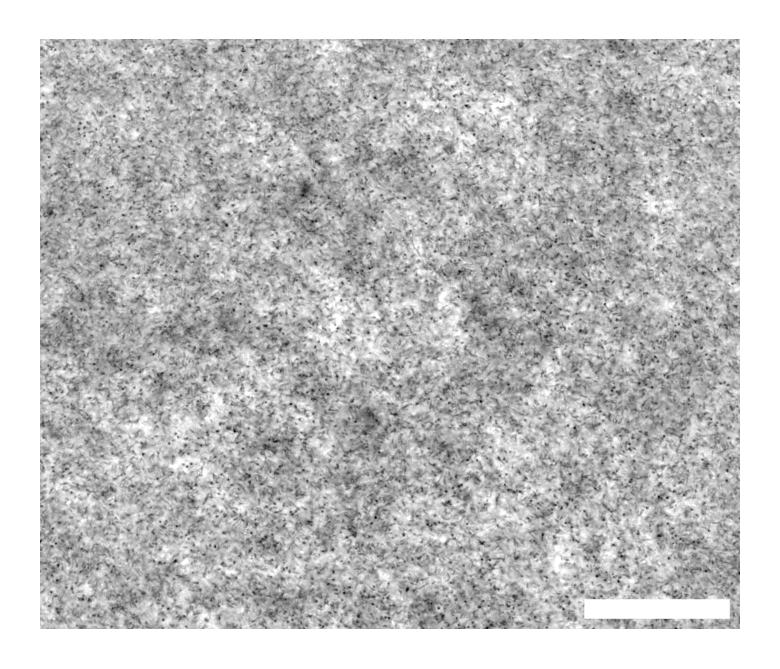

In [39]:
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment\20-10-3000.tif'))
output_folder = os.path.join(data_master_dir, r'Research projects\DF\Figures\experiment')
fig = plt.figure(figsize=(1.75, 1.75*img.shape[0]/img.shape[1]))
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray', vmin=140, vmax=180)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)
fig.savefig(os.path.join(output_folder, '20_raw.pdf'))

## Figure 2: spatial correlation functions and correlation lengths

- (a) velocity correlation
- (b) concentration correlation
- (c) correlation length
- (d) ratio between two correlation lengths

### (a) Velocity correlation

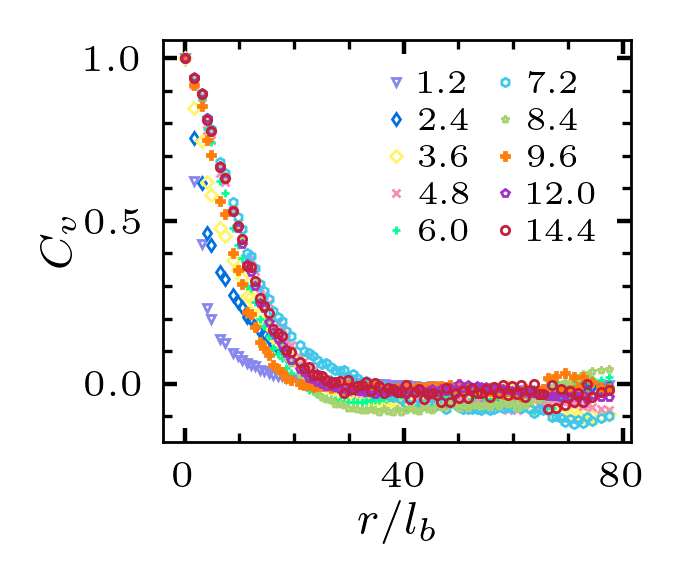

In [6]:
data = pd.read_csv(os.path.join(data_master_dir, 
                                r'Research projects\DF\data\spatial-correlation\velocity-correlation.csv')).set_index('R')
data = data.drop(columns=['0', '85'])
fig, ax = plt.subplots()
lb = 10 # px
for kw in data:
    ax.plot(data.index/lb, data[kw],
            ls='', marker=marker_list[color_dict[kw]], markersize=1.5, label='{:.1f}'.format(int(kw)*n0_to_vf),
            mec=wowcolor(color_dict[kw]), mfc=(0,0,0,0), mew=0.5)
ax.legend(fontsize=6, ncol=2)
ax.set_xlabel('$r/l_b$')
ax.set_ylabel('$C_{v}$')
ax.set_xticks([0, 40, 80])
ax.set_yticks([0, 0.5, 1])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\velocity-correlation.pdf'))

### (b) Concentration correlation

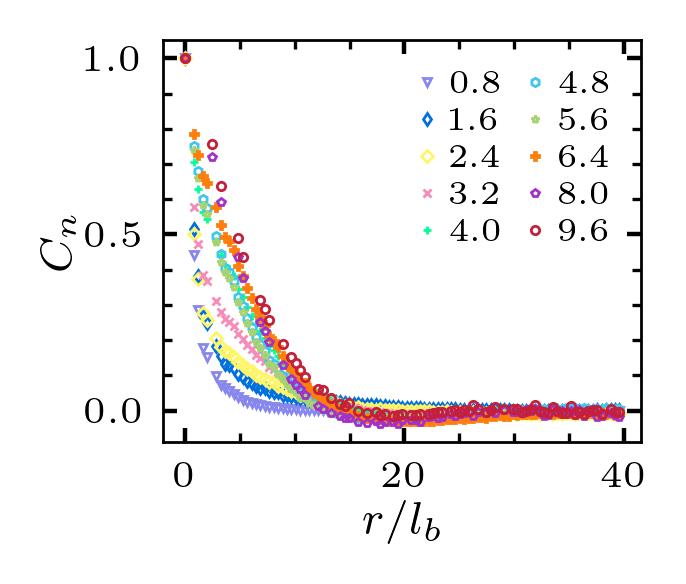

In [4]:
data = pd.read_csv(os.path.join(data_master_dir, 
                                r'Research projects\DF\data\spatial-correlation\intensity-correlation.csv')).set_index('R')
data = data.drop(columns=['0', '85'])
fig, ax = plt.subplots()
lb = 10 # px
for kw in data:
    ax.plot(data.index/lb, data[kw],
            ls='', marker=marker_list[color_dict[kw]], markersize=1.5, label='{:.1f}'.format(int(kw)*n0_to_vf),
            mec=wowcolor(color_dict[kw]), mfc=(0,0,0,0), mew=0.5)
ax.legend(fontsize=6, ncol=2)
ax.set_xlabel('$r/l_b$')
ax.set_ylabel('$C_{n}$')
ax.set_yticks([0, 0.5, 1])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\density-correlation.pdf'))

### (c) Correlation lengths

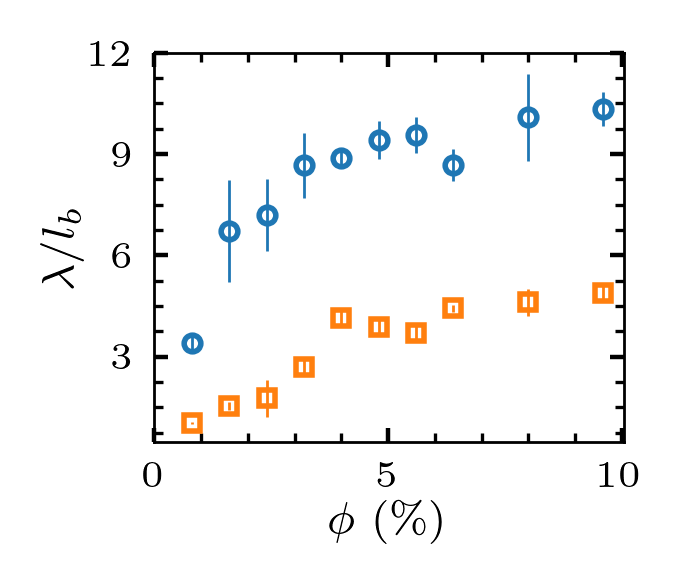

In [7]:
clv_data = pd.read_csv(os.path.join(data_master_dir, 
                                   r'Research projects\DF\data\spatial-correlation\velocity-correlation-length.csv')) \
                                    .set_index('conc')
clv_data = clv_data.drop(85)
cln_data = pd.read_csv(os.path.join(data_master_dir, 
                                   r'Research projects\DF\data\spatial-correlation\intensity-correlation-length.csv')) \
                                    .set_index('conc')
cln_data = cln_data.drop(85)

# fig, ax = plt.subplots(figsize=(1.75, 1.5), dpi=300)
fig, ax = plt.subplots()
lb = 10 # px
ax.errorbar(clv_data.index*n0_to_vf, clv_data['avg']/lb, yerr=clv_data['err']/lb, 
            ls='', elinewidth=0.5, marker='o', label='velocity', markersize=3, 
            mec=bestcolor(0), mfc=(0,0,0,0), ecolor=bestcolor(0))
ax.errorbar(cln_data.index*n0_to_vf, cln_data['avg']/lb, yerr=cln_data['err']/lb, 
            ls='', elinewidth=0.5, marker='s', label='concentration', markersize=3, 
            mec=bestcolor(1), mfc=(0,0,0,0), ecolor=bestcolor(1))
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\lambda/l_b$')
# ax.legend(loc='lower right', fontsize=4)
ax.set_xticks([0, 5, 10])
ax.set_yticks([3, 6, 9, 12])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\correlation-length.pdf'))

### (d) Ratio between two correlation lengths

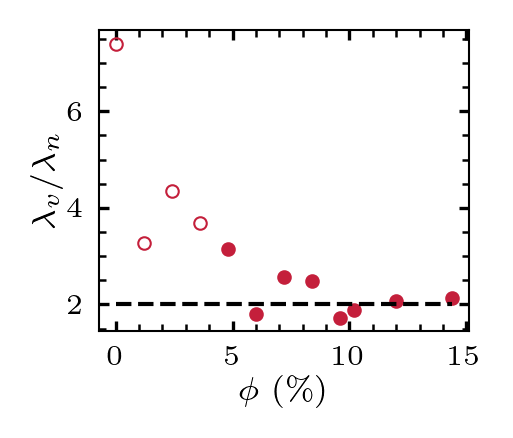

In [9]:
# velocity correlation
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='corrV')
data = data.dropna()
# concentration correlation
data1 = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='corrI')
data1 = data1.dropna()
lv = np.array(data['avg'])
ln = np.array(data1['avg'])

fig, ax = plt.subplots(dpi=300)
ax.plot(data['conc'][0:4]*n0_to_vf, (lv/ln)[0:4], marker='o', ls='', mfc=(0,0,0,0),
        mew=0.5, mec=wowcolor(0), markersize=3)
ax.plot(data['conc'][4:]*n0_to_vf, (lv/ln)[4:], marker='o', ls='', mfc=wowcolor(0),
        mew=0.5, mec=wowcolor(0), markersize=3)
ax.plot([0, 120*n0_to_vf], [2, 2], ls='--', color='black', lw=1)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\lambda_{v}/\lambda_{n}$')

plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatial-correlations\correlation-length-ratio.pdf'))

### (e) Density autocorrelation

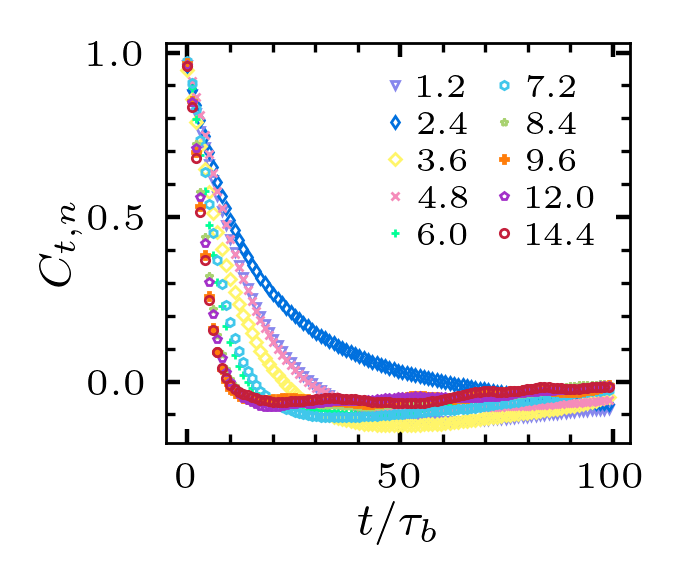

In [10]:
ac_df = pd.read_csv(os.path.join(data_master_dir, 
                                 r'Research projects\DF\data\autocorrelation\density_autocorrelation.csv')).set_index('t')
ac_df.drop(columns=['0', '85'], inplace=True)
tb = 0.2 # s
fig, ax = plt.subplots()
for c in ac_df:
    ax.plot(ac_df.index/tb, ac_df[c],
            marker=marker_list[color_dict[str(c)]], markersize=1.5, 
            ls='', label='{:.1f}'.format(int(c)*n0_to_vf),
            mec=wowcolor(color_dict[str(c)]), mfc=(0,0,0,0), mew=0.5)
ax.legend(ncol=2, fontsize=6)
ax.set_xlabel('$t/\\tau_b$')
ax.set_ylabel('$C_{t, n}$')
ax.set_yticks([0, 0.5, 1])
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\density_autocorrelation.pdf'))

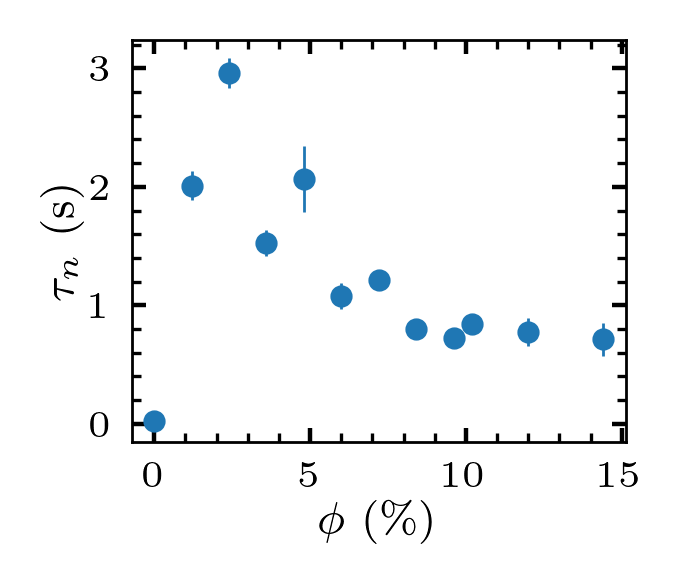

In [12]:
cl_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
fig, ax = plt.subplots()
ax.errorbar(cl_df.index*n0_to_vf, cl_df['avg'], yerr=cl_df['err'],
            ls='', marker='o', markersize=3, elinewidth=0.5)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\tau_n$ (s)')
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\autocorrelation\density_autocorrelation_time.pdf'))

### (f) Velocity autocorrelation

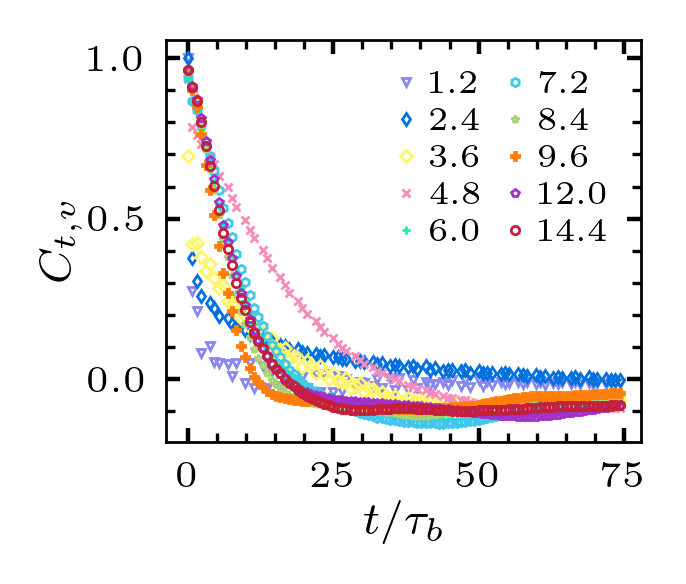

In [13]:
ac_df = pd.read_csv(os.path.join(data_master_dir, 
                                 r'Research projects\DF\data\autocorrelation\velocity_autocorrelation.csv')).set_index('t')
ac_df.drop(columns=['0', '85'], inplace=True)
tb = 0.2 # second
fig, ax = plt.subplots()
for c in ac_df:
    ax.plot(ac_df.index/tb, ac_df[c],
            marker=marker_list[color_dict[str(c)]], markersize=1.5, 
            ls='', label='{:.1f}'.format(int(c)*n0_to_vf),
            mec=wowcolor(color_dict[str(c)]), mfc=(0,0,0,0), mew=0.5)
ax.legend(ncol=2, fontsize=6)
ax.set_xlabel('$t/\\tau_b$')
ax.set_ylabel('$C_{t, v}$')
ax.set_yticks([0, 0.5, 1])
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\velocity_autocorrelation.pdf'))

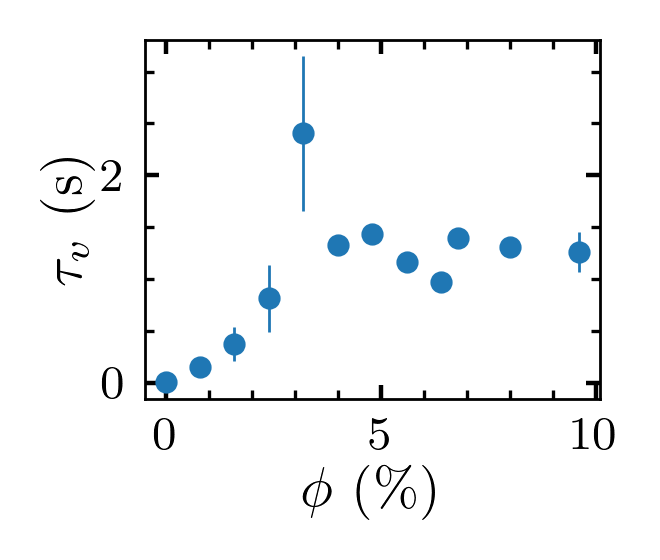

In [86]:
cl_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
fig, ax = plt.subplots()
ax.errorbar(cl_df.index*0.08, cl_df['avg'], yerr=cl_df['err'],
            ls='', marker='o', markersize=3, elinewidth=0.5)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\tau_v$ (s)')
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\autocorrelation\velocity_autocorrelation_time.pdf'))

### (g) Plot density and velocity correlation time together

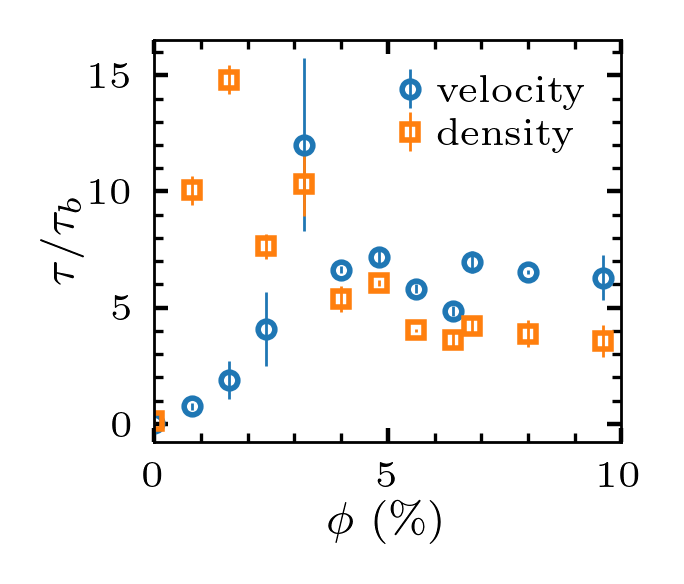

In [9]:
cln_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\density_autocorrelation_time.csv')).set_index('conc')
clv_df = pd.read_csv(os.path.join(data_master_dir, 
                          r'Research projects\DF\data\autocorrelation\velocity_autocorrelation_time.csv')).set_index('conc')
fig, ax = plt.subplots()
tb = 0.2 # second
ax.errorbar(clv_df.index*n0_to_vf, clv_df['avg']/tb, yerr=clv_df['err']/tb,
            ls='', marker='o', markersize=3, elinewidth=0.5,
            mfc=(0,0,0,0), mec=bestcolor(0), label='velocity')
ax.errorbar(cln_df.index*n0_to_vf, cln_df['avg']/tb, yerr=cln_df['err']/tb,
            ls='', marker='s', markersize=3, elinewidth=0.5, 
            mfc=(0,0,0,0), mec=bestcolor(1), label='density')

ax.legend(loc='upper right', fontsize=7)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\tau/\\tau_b$')
ax.set_xlim([0, 10])
ax.set_xticks([0, 5, 10])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\spatiotemporal-correlations\both_autocorrelation_time.pdf'))

## Figure 3: concentration dependence of $\alpha$

- (a) standard deviation at various subsystem sizes
- (b) concentration dependence of $\alpha$
- (c) concentration dependence of energy $E$

### (a) standard deviation at various subsystem sizes

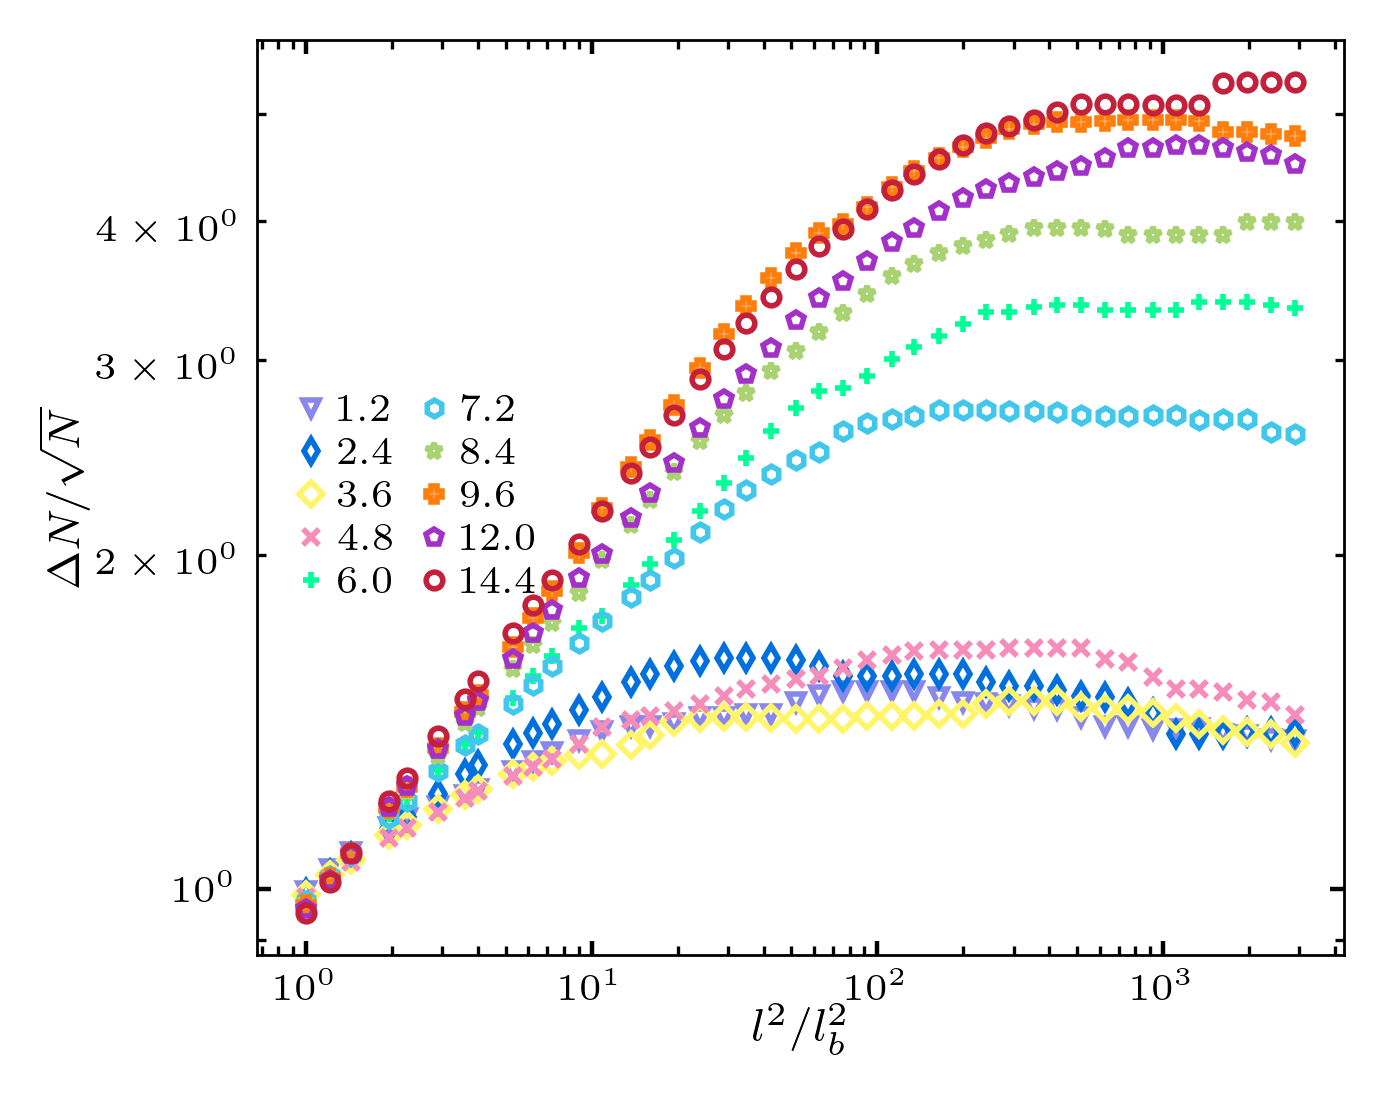

In [33]:
data_gnf = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\GNF\GNF-1.csv')).set_index('l_r')
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for str_c in data_gnf:
    if str_c != '85': # don't plot 85 data
        ax.plot(data_gnf.index, signal.medfilt(data_gnf[str_c], 5),
               marker=marker_list[color_dict[str_c]],
               markersize=3, ls='', label='{:.1f}'.format(int(str_c)*n0_to_vf), 
               mec=wowcolor(color_dict[str_c]), mfc=(0,0,0,0), mew=1)
ax.legend(loc='center left', ncol=2, fontsize=7)
ax.set_xlabel('$l^2/l_b^2$')
ax.set_ylabel('$\Delta N/\sqrt N$')
ax.set_yticks([1, 2, 3, 4, 6])
ax.set_yticklabels(['1', '2', '3', '4', '6'])
ax.loglog()       
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\dN~N-normalize.pdf'))

### (b) concentration dependence of $\alpha$

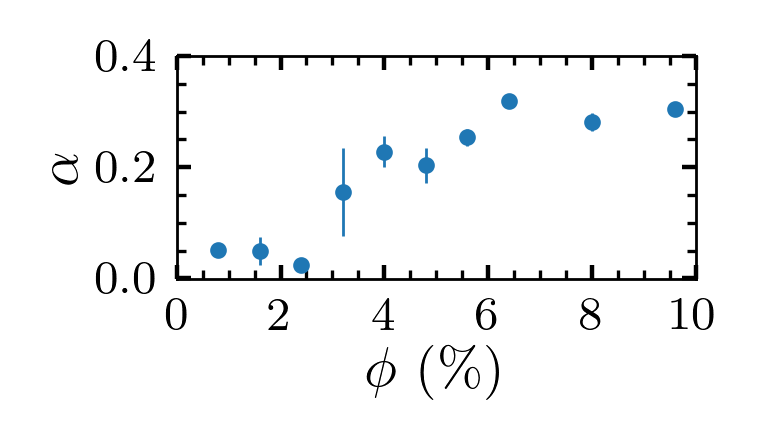

In [174]:
alpha_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\GNF\alpha.csv')).set_index('conc').drop(index=85)
fig, ax = plt.subplots(figsize=(2, 1.2))
ax.errorbar(alpha_data.index*0.08, alpha_data['mean'], yerr=alpha_data['std'],
           ls='', elinewidth=0.5, marker='o', markersize=2)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$')
ax.set_xlim([0, 10])
# ax.set_ylim([0, 0.4])
ax.set_yticks([0, 0.2,  0.4])
ax.set_xticks([0, 2, 4, 6, 8, 10])
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\alpha-phi-small.pdf'))

### (c) concentration dependence of energy $E$

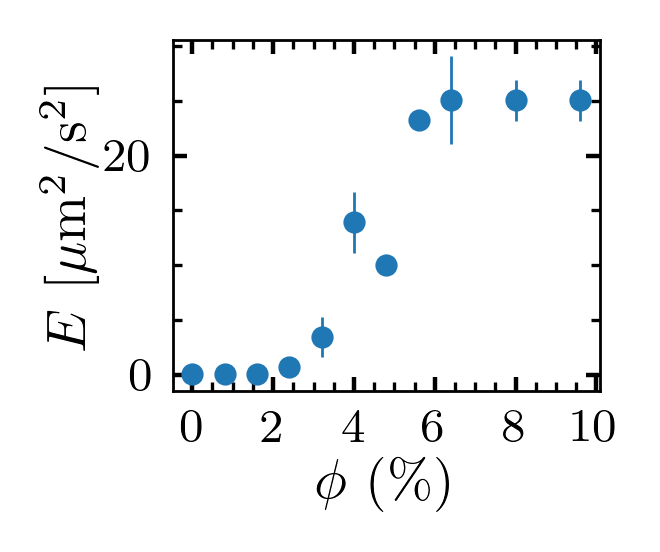

In [92]:
# load data and plot
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='energy_order').drop(index=9)
# data = data.dropna()
fig, ax = plt.subplots()
ax.errorbar(data['conc'] * 0.08, data['energy_avg'] * 0.33 * 0.33, 
            yerr=data['energy_std']* 0.33 * 0.33, ls='', elinewidth=0.5, marker='o', markersize=3)
# plt.xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$E$ [$\mu$m$^2$/s$^2$]')
ax.set_xticks([0, 2, 4, 6, 8, 10])
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\energy-phi.pdf'))

### (d) concentration dependence of $OP$

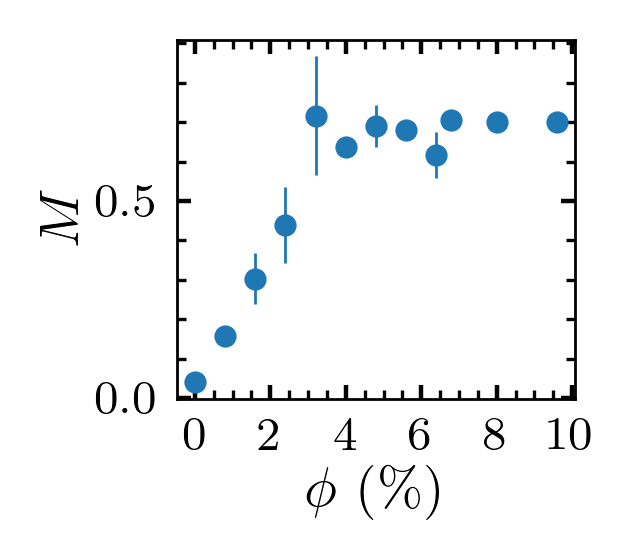

In [93]:
fig, ax = plt.subplots()
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='energy_order')
ax.errorbar(data['conc']*0.08, data['order_avg'], yerr=data['order_std'],
                ls='', marker='o', markersize=3, mew=1, lw=0.5)
# plt.xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$M$')
ax.set_xticks([0, 2, 4, 6, 8, 10])
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\M-phi.pdf'))

### (e) plot $\alpha$ and $E$ on the same axis

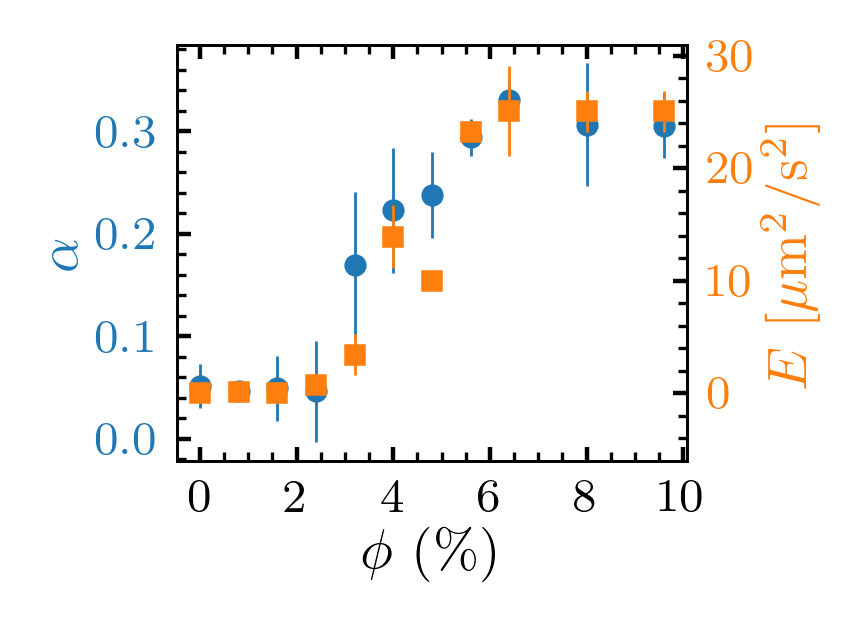

In [95]:
# load data and plot
fig, ax = plt.subplots(figsize=(2.25, 1.65), dpi=400)
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='df2')
# data = data.dropna()
ax.errorbar(data['conc'] * 0.08, data['avg'], yerr=data['std'], ls='', elinewidth=0.5, marker='o', markersize=3)
# ax.set_xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$', color=bestcolor(0))
ax.tick_params(axis='y', labelcolor=bestcolor(0))
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.set_xticks([0, 2, 4, 6, 8, 10])

ax1 = ax.twinx()
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='energy_order').drop(index=9)
ax1.errorbar(data['conc'] * 0.08, data['energy_avg'] * 0.33 * 0.33, yerr=data['energy_std']* 0.33 * 0.33, 
             ls='', elinewidth=0.5, marker='s', markersize=3, color=bestcolor(1))
ax1.set_ylabel('$E$ [$\mu$m$^2$/s$^2$]', color=bestcolor(1))
ax1.tick_params(axis='y', labelcolor=bestcolor(1))
ax1.set_yticks([0, 10, 20, 30])
ax1.set_ylim([-6, 31])

plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\alpha&E-phi.pdf'))

### (f) Small length GNF

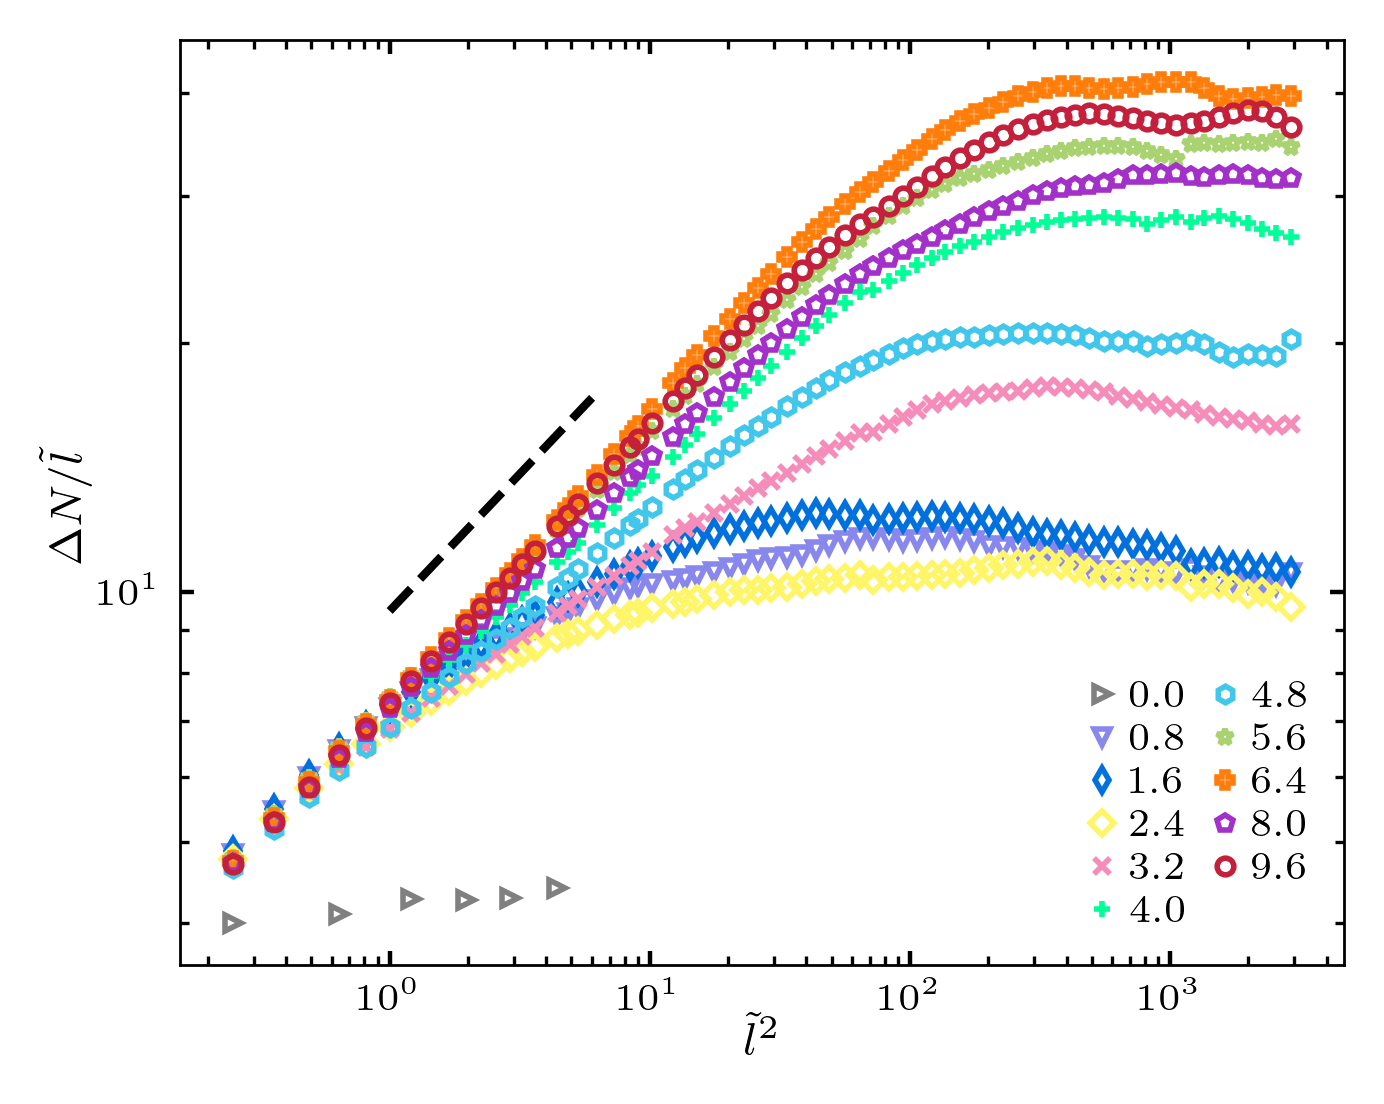

In [5]:
out_folder = 'transient-GNF-energy-dN'
data_list = []
for file in ['GNF-0.csv', 'GNF-1.csv', 'GNF-2.csv']:
    data_gnf = pd.read_csv(os.path.join(data_master_dir, 
                                        r'Research projects\DF\data\{}\GNF'.format(out_folder), file)).set_index('l_r')
    data_list.append(data_gnf)
master = pd.concat(data_list, keys=[0, 1, 2], axis=1).mean(level=1, axis=1)
master = master[0.25:]


fig, ax = plt.subplots(figsize=(3.5, 2.8))

# phi=0 data
folder = r'E:\moreData\08032020\df2_kinetics\12'
data = pd.read_csv(os.path.join(folder, r'kinetics_data.csv'))
x, y = postprocess_gnf(data, lb=10, xlim=[0.25, 5], normalize='1')
ax.plot(x, y*4, 
         mec='gray', mfc=(0,0,0,0), markersize=3, mew=1, marker=marker_list[color_dict['0']], ls='',
       label='0.0')

for str_c in master:
    if str_c != '85': # don't plot 85 data
        ax.plot(master.index, master[str_c] / master.index**0.5,
               mec=wowcolor(color_dict[str_c]), marker=marker_list[color_dict[str_c]], mfc=(0,0,0,0), mew=1,
               markersize=3, ls='', label='{:.1f}'.format(int(str_c)*n0_to_vf))
ax.legend(loc='lower right', ncol=2, fontsize=7)
# ax.set_xlabel('$l^2/l_b^2$')
ax.set_xlabel('$\\tilde{l}$$^2$')
ax.set_ylabel('$\Delta N/\\tilde{l}$')
ax.set_yticks([1, 2, 3, 4, 6])
ax.set_yticklabels(['1', '2', '3', '4', '6'])
ax.loglog()       
plt.tight_layout()

# 0.83 and 0.5 slopes
# x = np.array([1, 8])
# plt.plot(x, 15*x**0.83, ls='--', color='black')
# x = np.array([300, 2000])
# plt.plot(x, 70*x**0.5, ls='--', color='black')
# x = np.array([0.25, 2800])
# plt.plot(x, 2*x**0.52, ls='--', color='black', lw=0.5)

# 0.33 slope
x = np.array([1, 6])
plt.plot(x, 9.5*x**0.33, ls='--', color='black')

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\dN~N-ndl.pdf'))

### (g) Fit alpha from small length GNF

In order to determine the fitting ranges for different concentrations we need to load the correlation length data first. 

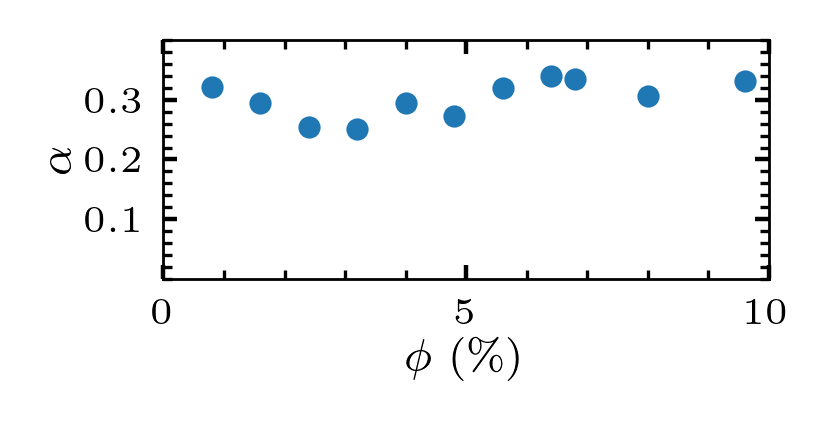

In [26]:
# load correlation length data
data_dir = os.path.join(data_master_dir, r'Research projects\DF\data\spatial-correlation\intensity-correlation-length.csv')
cl_data = pd.read_csv(data_dir).set_index('conc')
l2 = (cl_data['avg'] / 10) ** 2
l2 = l2.to_frame('l2').transpose()

# load GNF steady state data
out_folder = 'transient-GNF-energy-small'
count = 0
for file in ['GNF-0.csv', 'GNF-1.csv', 'GNF-2.csv']:
    data_gnf = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\{}\GNF'.format(out_folder), file)).set_index('l_r')
    if count == 0:
        master = data_gnf
    else:
        master += data_gnf
    count += 1
master /= 3

alpha_list = []
for c in master:
    l_max = l2[int(c)]
    yfit = np.log(master[c][:int(l_max)])
    xfit = np.log(yfit.index)
    p = np.polyfit(xfit, yfit, deg=1)
    alpha_list.append(p[0])
    
fig, ax = plt.subplots(figsize=(2, 1))
ax.plot(master.keys().astype('int')*n0_to_vf, alpha_list, ls='', marker='o', markersize=3)
ax.set_ylim([0, 0.4])
plt.tight_layout()

ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$')
ax.set_xlim([0, 10])
# ax.set_ylim([0, 0.4])
ax.set_yticks([0.1, 0.2, 0.3])
ax.set_xticks([0, 5, 10])

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF\alpha-phi-large-range.pdf'))

In [12]:
l2[10]

l2    1.069471
Name: 10, dtype: float64

## Figure 4: evolution

- (a) standard deviation during the onset of active turbulence
- (b) temporal evolution of $\alpha$, $E$ and $OP$

### Evolution plots gallery

|concentration|sample 1|sample 2|sample 3|
|:---------:|:---------:|:---------:|:---------:|
|85|![](temp_data\kinetics_eo\85-1.png)|![](temp_data\kinetics_eo\85-2.png)|![](temp_data\kinetics_eo\85-3.png)|
|80|![](temp_data\kinetics_eo\80-1.png)|![](temp_data\kinetics_eo\80-2.png)|![](temp_data\kinetics_eo\80-3.png)|
|70|![](temp_data\kinetics_eo\70-1.png)|![](temp_data\kinetics_eo\70-2.png)|![](temp_data\kinetics_eo\70-3.png)|
|60|![](temp_data\kinetics_eo\60-1.png)|![](temp_data\kinetics_eo\60-2.png)|![](temp_data\kinetics_eo\60-3.png)|
|50|![](temp_data\kinetics_eo\50-1.png)|![](temp_data\kinetics_eo\50-2.png)|![](temp_data\kinetics_eo\50-3.png)|
|40|![](temp_data\kinetics_eo\40-1.png)|![](temp_data\kinetics_eo\40-2.png)|![](temp_data\kinetics_eo\40-3.png)|
|30|![](temp_data\kinetics_eo\30-1.png)|![](temp_data\kinetics_eo\30-2.png)|![](temp_data\kinetics_eo\30-3.png)|
|20|![](temp_data\kinetics_eo\20-1.png)|![](temp_data\kinetics_eo\20-2.png)|![](temp_data\kinetics_eo\20-3.png)|
|10|![](temp_data\kinetics_eo\10-1.png)|![](temp_data\kinetics_eo\10-2.png)|![](temp_data\kinetics_eo\10-3.png)|
|0|![](temp_data\kinetics_eo\0-1.png)|![](temp_data\kinetics_eo\0-2.png)|![](temp_data\kinetics_eo\0-3.png)|

### (a) standard deviation during the onset of active turbulence

In [6]:
folder = os.path.join(data_master_dir, r'Research projects\DF\data\level-2-data\08032020\df2_kinetics\02')
k_data = pd.read_csv(os.path.join(folder, r'kinetics_data.csv'))

# segments = np.floor(np.linspace(2, k_data.segment.max(), 10))
seg_length = 50
master = pd.DataFrame()
for s in k_data['segment'].drop_duplicates():
    subdata = k_data.loc[k_data['segment']==s]
    x, y = postprocess_gnf(subdata, lb=10, normalize=None, xlim=[0.25, 10000], sparse=1)
    temp_df = pd.DataFrame({'l_r': x, str(int((s-1)*seg_length)): y}).set_index('l_r')
    master = pd.concat((master, temp_df), axis=1)

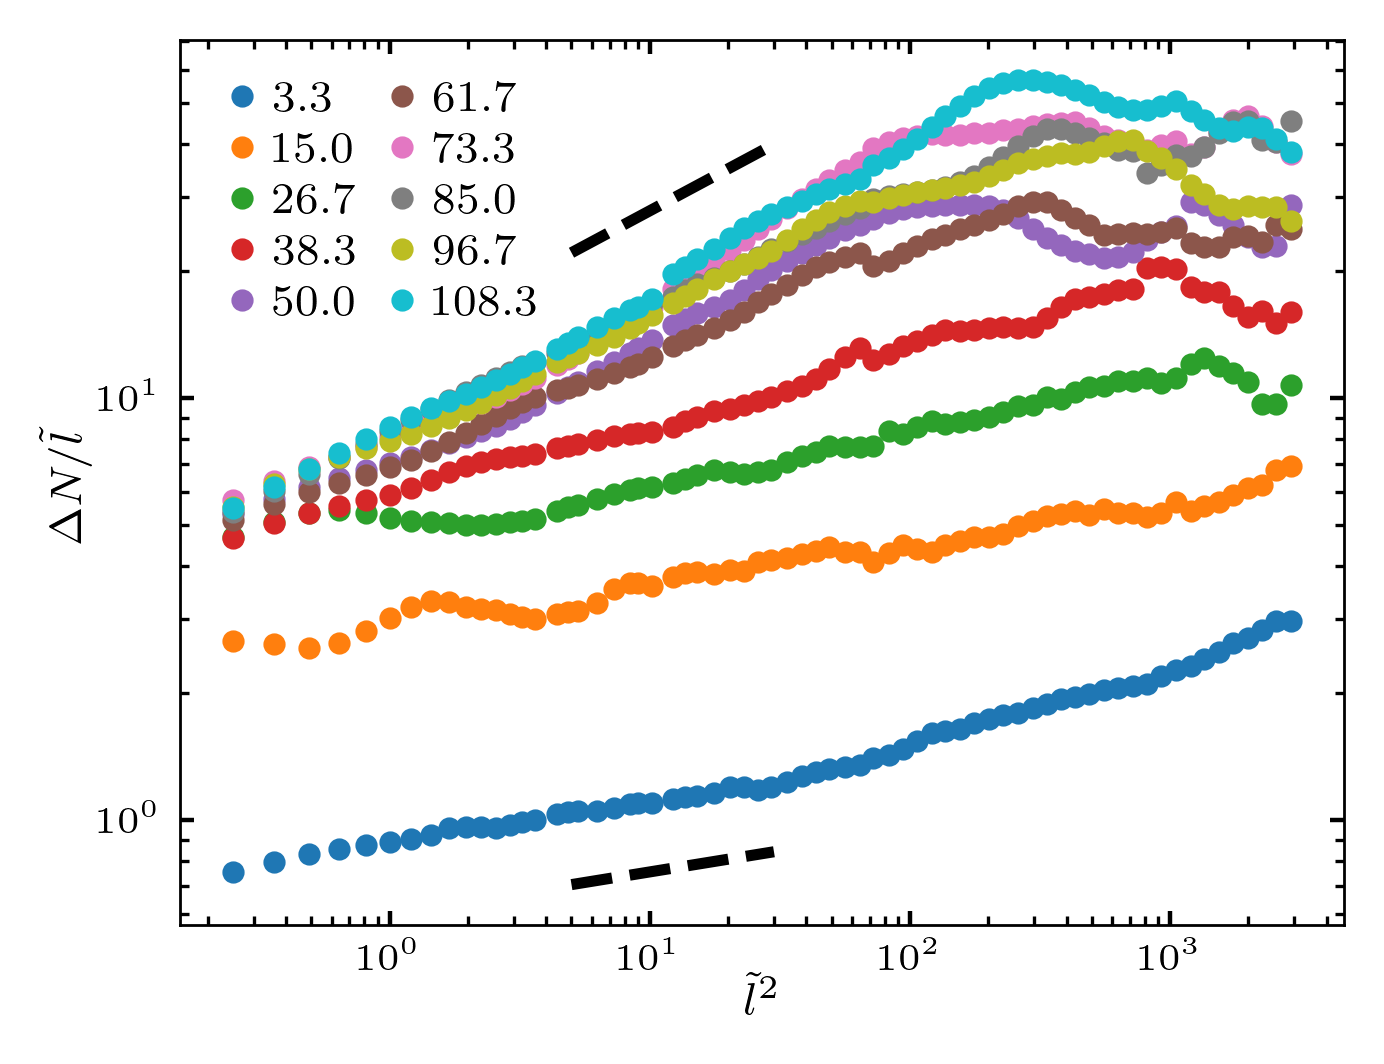

In [9]:
selected_frames = master.keys()[2:len(master.keys()):7]
fig, ax = plt.subplots(figsize=(3.5, 2.7))
for frame in selected_frames:
    ax.plot(master.index, master[frame]/2.5, 
            label='{:.1f}'.format(int(frame)/30), ls='', marker='o', markersize=3)
ax.legend(ncol=2, loc='upper left', fontsize=8)
ax.loglog()
ax.set_xlabel('$\\tilde{l}^2$')
ax.set_ylabel('$\Delta N/\\tilde l$')

# 0.83 and 0.6 slope
# x = np.array([3, 30])
# ax.plot(x, 0.5*x**0.6,
#         ls='--', lw=2, color='black')
# ax.plot(x, 20*x**0.83,
#         ls='--', lw=2, color='black')

# 0.33 and 0.1 slope
x = np.array([5, 30])
ax.plot(x, 0.6*x**0.1,
        ls='--', lw=2, color='black')
ax.plot(x, 13*x**0.33,
        ls='--', lw=2, color='black')

plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, 
                         r'Research projects\DF\Figures\GNF-energy-correlation-transient\transient-GNF-dN-ndl.pdf'))

### (b) temporal evolution of $\alpha$, $E$ and $OP$

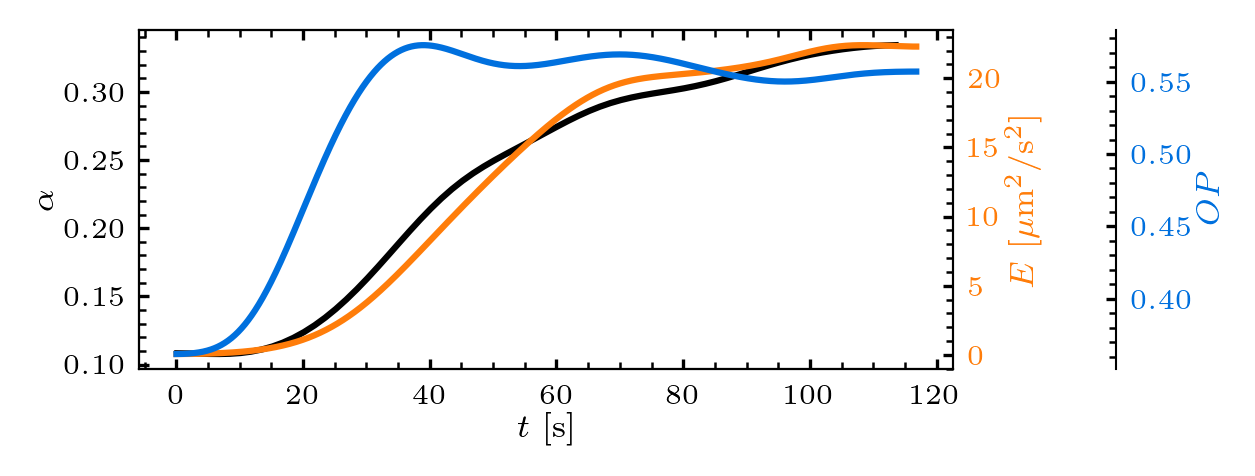

In [45]:
data_path = os.path.join(data_master_dir, r'Research projects\DF\data\level-2-data\08032020')
n = 2
k_data = pd.read_csv(os.path.join(data_path, 'df2_kinetics\{:02d}\kinetics_data.csv'.format(n)))
i_data = pd.read_csv(os.path.join(data_path, 'overall_intensity\{:02d}\intensity.csv'.format(n)))
eo_data = pd.read_csv(os.path.join(data_path, 'energy_order\{:02d}\energy_order.csv'.format(n)))
tm.prl('1-column-1-panel')
data = plot_kinetics_eo(k_data, i_data, eo_data, xlim=[0.05, 25], seg_length=50, fps=30, plot=False)
data = kinetics_eo_from_light_on(data, plot=False)
new_data, fig, ax = kinetics_eo_smooth(data)
# fig.savefig(os.path.join(data_path, 'df2_kinetics\{:02d}.svg'.format(n)))

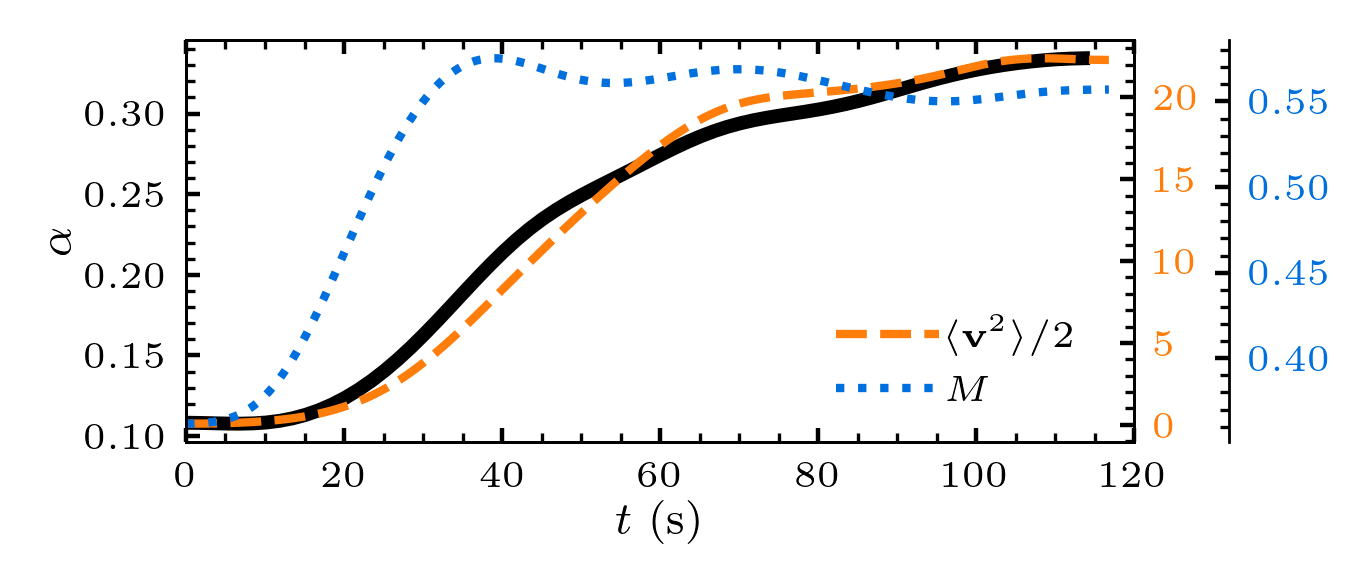

In [51]:
# redo the plot
# tm.prl('1-column-1-panel')
fig, ax1 = plt.subplots(figsize=(3.5, 1.5))
    
color = 'black'
ax1.set_xlabel('$t$ (s)')
ax1.set_ylabel('$\\alpha$', color=color)
ax1.plot(new_data['t0'], new_data['alpha'], color=color, ls='-', lw=2.5)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5), handlelength=3)

color = wowcolor(2)
ax2 = ax1.twinx()
# ax2.set_ylabel('$E$ [$\mu$m$^2$/s$^2$]', color=color)
ax2.plot(new_data['t2'], new_data['E'], color=color, ls='--', label='$\langle \mathbf{v}^2 \\rangle/2$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper left', bbox_to_anchor=(0.65, 0.4), handlelength=2.8)


color = wowcolor(8)
ax3 = ax1.twinx()
# ax3.set_ylabel('$M$', color=color)
ax3.plot(new_data['t2'], new_data['OP'], color=color, ls=':', label='$M$')
ax3.tick_params(axis='y', labelcolor=color)
ax3.spines["right"].set_position(("axes", 1.1))

ax3.set_xlim([0, 120])
ax3.legend(loc='upper left', bbox_to_anchor=(0.65, 0.25), handlelength=2.8)
plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, 
                         r'Research projects\DF\Figures\GNF-energy-correlation-transient\alpha-E-M-kinetics.pdf'))

### (c) PIV overlay during the transition

S:\Anaconda\3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


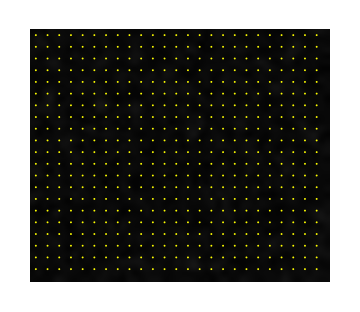

In [74]:
n = 100 # 100: t=0s, 1300: t=40s, 3200: t=103s
img = io.imread(os.path.join(data_master_dir, r'Research projects\DF\data\kinetics-PIV-overlay\{:04d}.tif'.format(n)))
ldf = np.load(os.path.join(data_master_dir, 
                           r'Research projects\DF\data\kinetics-PIV-overlay\{:04d}.npy'.format(n)))
pivData = pd.read_csv(os.path.join(data_master_dir, 
                                   r'Research projects\DF\data\kinetics-PIV-overlay\{0:04d}-{1:04d}.csv').format(n, n+1))
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
h, w = img.shape
wf = 1
hf = h / w * wf

fig = plt.figure(figsize=(wf, hf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
im = ax.imshow(ldf, cmap='gray', vmin=0, vmax=1.31, extent=(0,w,h,0), interpolation='spline16')
# plt.colorbar(im)
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, 
          sparcified_pivData.v, color='yellow', width=0.007, scale=1200)
ax.axis('off')

# shape, xy = scalebar_shape_position(img.shape)
# draw_scalebar(ax, shape, xy)
# scale bar: 85 um
plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, 
                         r'Research projects\DF\Figures\GNF-energy-correlation-transient\ldf-{:04d}.pdf'.format(n)))

## Figure 5: local correlations between concentration fluctuations and flow energy
This figure should illustrate briefly how the local correlation is calculated. A draft of this figure is shown below.

<img src='temp_data\Figure-fig5-draft.jpg' width='600px'></img>

- (a) Calculation illustration
    - Starting from a image stack
    - branch into coarse-grained image and PIV
    - calculate E and LDF from the two branches
    - calculate cross-correlation
- (b) Correlation as a function of volume fraction

### (a) Calculation illustration

#### Starting from a image stack

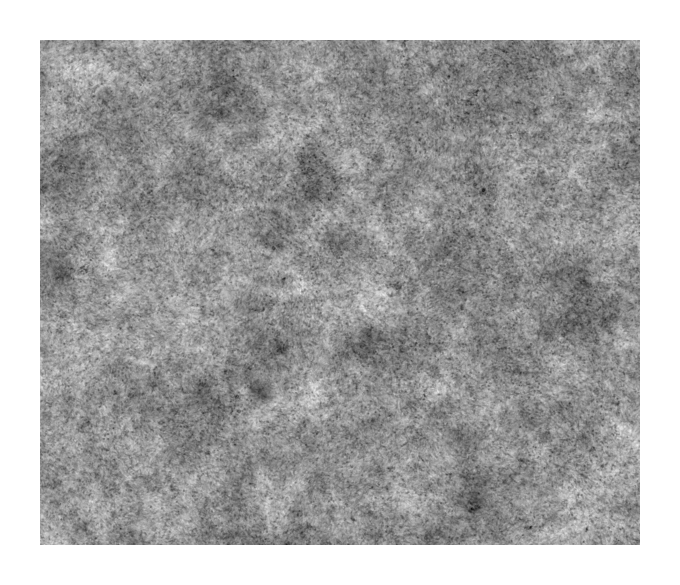

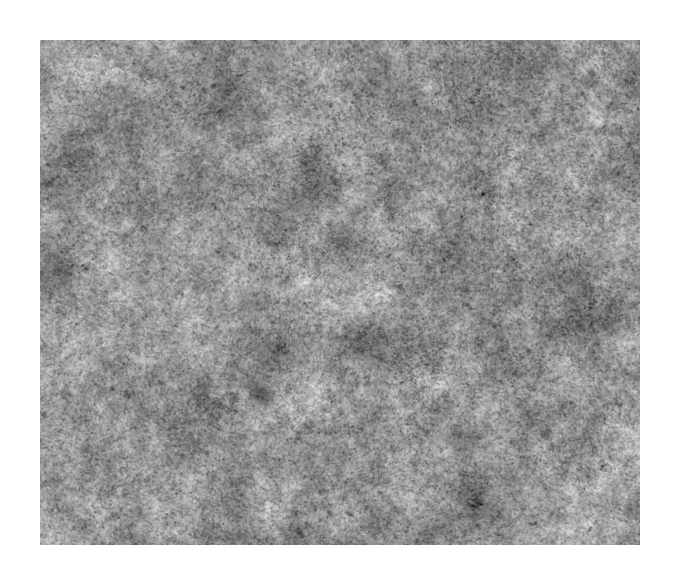

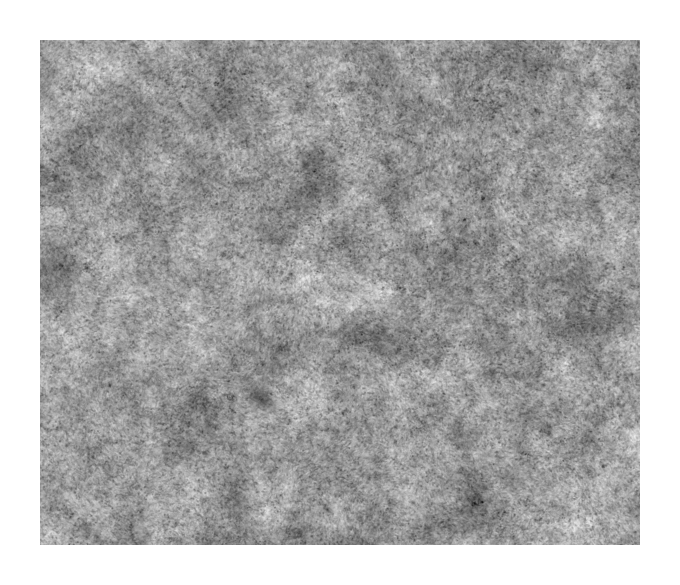

In [22]:
folder = r'E:\moreData\08032020\05\8-bit'
for i in [1390, 1400, 1410]:
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = fig.add_axes([0,0,1,1])
    img = io.imread(os.path.join(folder, '{:04d}.tif'.format(i)))
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    fig.savefig(os.path.join(data_master_dir,r'Research projects\DF\Figures\GNF-energy-correlation', '{:04d}.pdf'.format(i)))

#### branch into coarse-grained image and PIV
- coarse-grained image

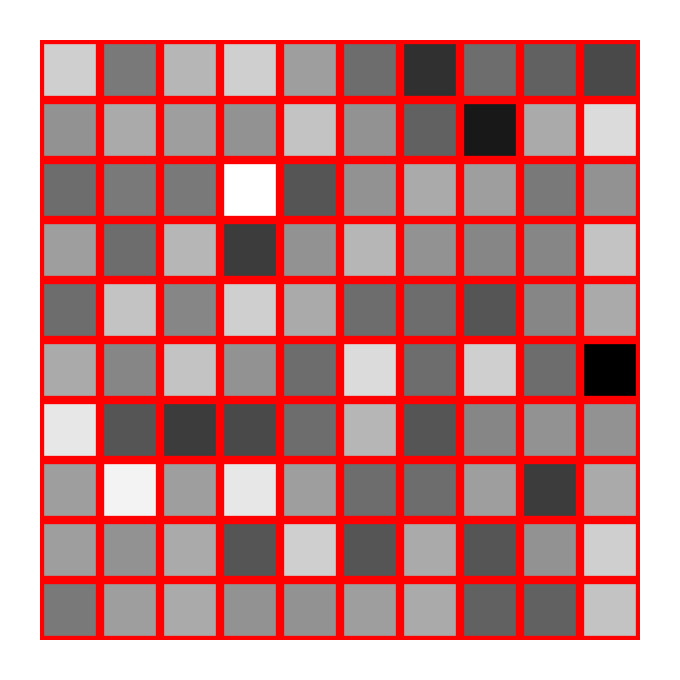

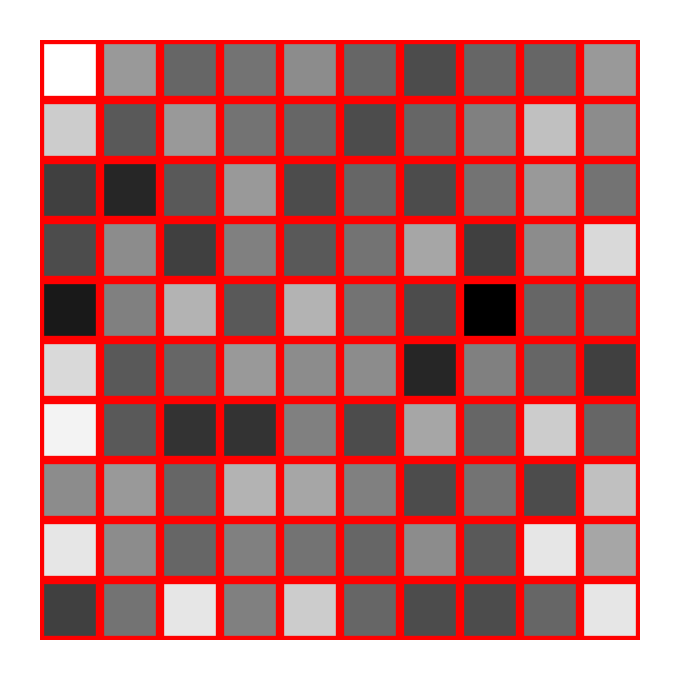

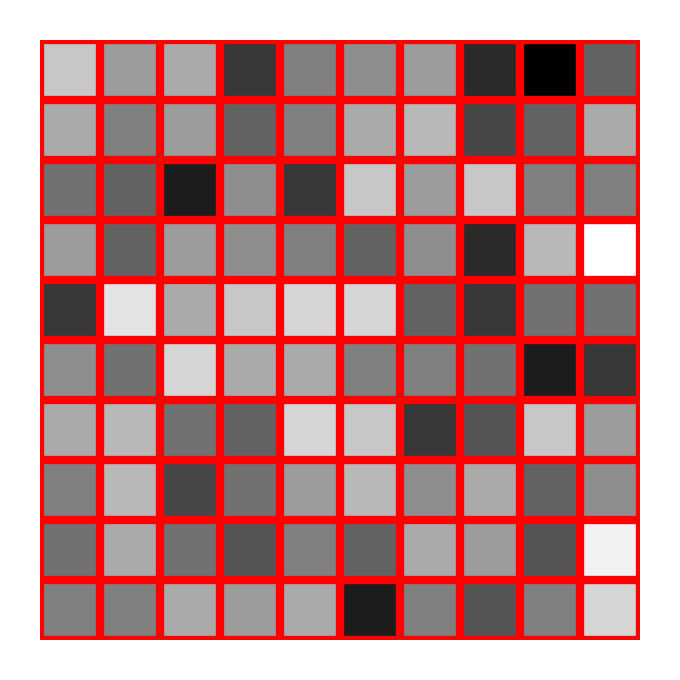

In [11]:
folder = r'E:\moreData\08032020\05\8-bit'
for i in [1390, 1400, 1410]:
    fig = plt.figure(figsize=(1.5, 1.5))
    ax = fig.add_axes([0,0,1,1])
    img = io.imread(os.path.join(folder, '{:04d}.tif'.format(i)))
    img_sc = cv2.resize(img, (10, 10))
    ax.imshow(img_sc, cmap='gray')
    X, Y = np.meshgrid(np.linspace(0, 10, 11)-0.5, np.linspace(0, 10, 11)-0.5)
    ax.plot(X, Y, color='red')
    ax.plot(Y, X, color='red')
    ax.axis('off')
#     fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation'), '{:04d}-coarse.pdf'.format(i))

- PIV

MATLAB:smoothn:SLowerBound
s = 0.029 : the lower bound for s has been reached. Put s as an input variable if required.
MATLAB:smoothn:SLowerBound
s = 0.029 : the lower bound for s has been reached. Put s as an input variable if required.


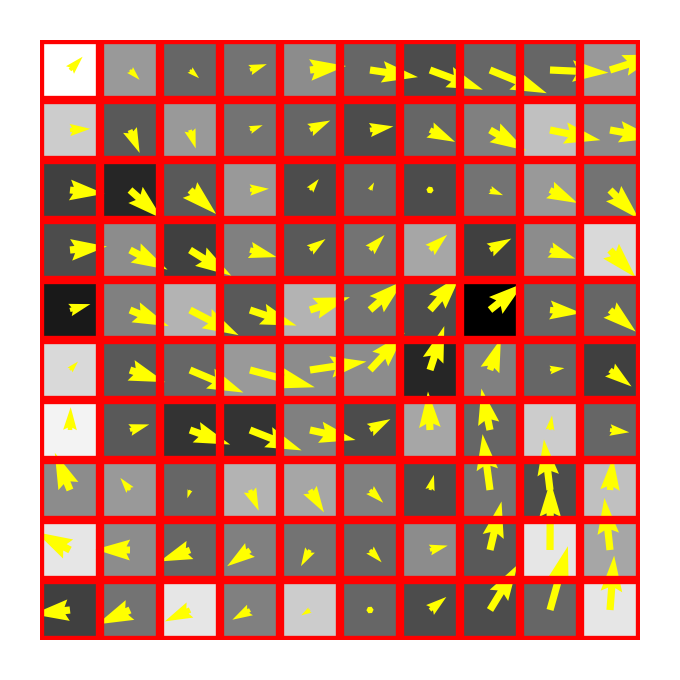

In [46]:
folder = r'E:\moreData\08032020\05\8-bit'
n = 1400
I0 = io.imread(os.path.join(folder, '{:04d}.tif'.format(n)))
I1 = io.imread(os.path.join(folder, '{:04d}.tif'.format(n+1)))
pivData = PIV1(I0, I1, winsize=150, overlap=75, dt=1)

x = pivData.sort_values(by=['x']).x.drop_duplicates()
y = pivData.y.drop_duplicates()
shape = (len(y), len(x))
X = np.array(pivData.x).reshape(shape)
Y = np.array(pivData.y).reshape(shape)
U = np.array(pivData.u).reshape(shape)
V = np.array(pivData.v).reshape(shape)

Uc = U[1:11, 1:11]
Vc = V[1:11, 1:11]

fig = plt.figure(figsize=(1.5, 1.5))
ax = fig.add_axes([0,0,1,1])
img = io.imread(os.path.join(folder, '{:04d}.tif'.format(n)))
img_sc = cv2.resize(img, (10, 10))
ax.imshow(img_sc, cmap='gray')
X, Y = np.meshgrid(np.linspace(0, 10, 11)-0.5, np.linspace(0, 10, 11)-0.5)
ax.plot(X, Y, color='red')
ax.plot(Y, X, color='red')
ax.axis('off')
ax.quiver(X[1:11, 1:11]-0.5, Y[1:11, 1:11]-0.5, Uc, Vc, color='yellow', width=0.012)

fig.savefig(r'E:\Google Drive\Research projects\DF\Figures\GNF-energy-correlation\PIV.pdf')

#### calculate E and LDF from the two branches

0.25317831613862163


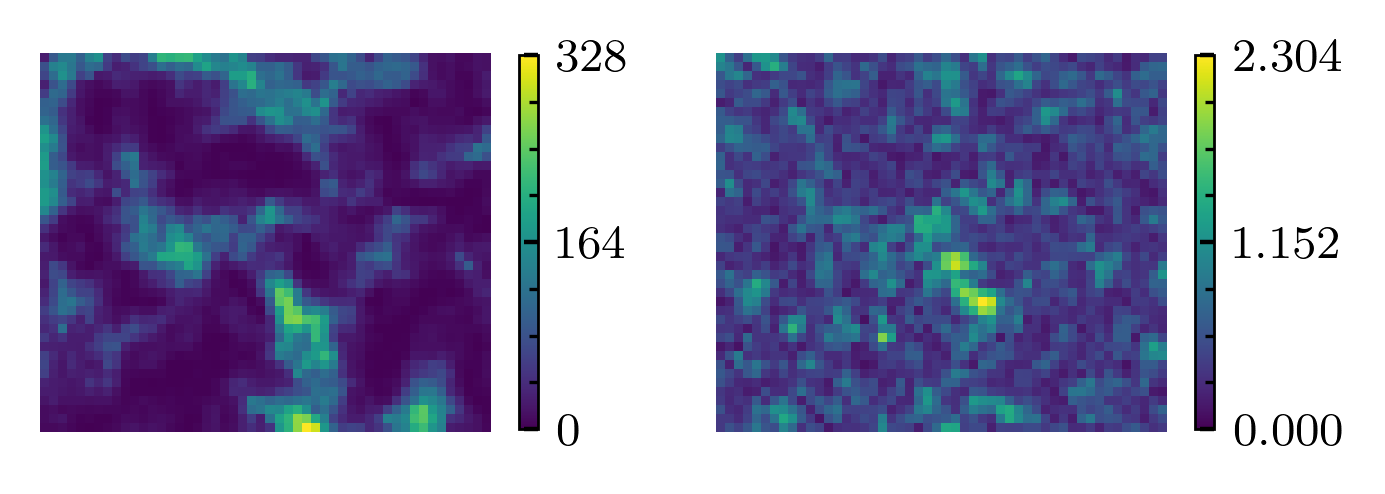

In [7]:
n = 1400
pivDir = r'E:\moreData\08032020\piv_imseq\05\{:04d}-{:04d}.csv'.format(n, n+1)
X, Y, U, V = read_piv(pivDir)
E = (U**2 + V**2) * 0.33 ** 2
# E = np.load(r'E:\moreData\08032020\flow_derivs\05\convection\{0:04d}-{1:04d}.npy'.format(n, n+1)) ** 2
ldfDir = r'E:\moreData\08032020\local_df\05\dt=10\{:04d}.npy'.format(n) 
LDF = np.load(ldfDir)
tm.prl('1-column-1-panel')
fig, ax = plt.subplots(nrows=1, ncols=2)
im1 = ax[0].imshow(E, vmin=0, vmax=E.max())#, interpolation='spline16', cmap='spring')
ax[0].axis('off')
fig.colorbar(im1, ax=ax[0], ticks=[0, E.max()/2, E.max()], shrink=0.75)
im2 = ax[1].imshow(LDF, vmin=0, vmax=LDF.max())#, interpolation='spline16', cmap='spring')
fig.colorbar(im2, ax=ax[1], ticks=[0, LDF.max()/2, LDF.max()], shrink=0.75)
ax[1].axis('off')
print(corr2d(E, LDF))
# fig.savefig(r'E:\Google Drive\Research projects\DF\Figures\GNF-energy-correlation\compare-fields.pdf')

### (b) Correlation as a function of volume fraction

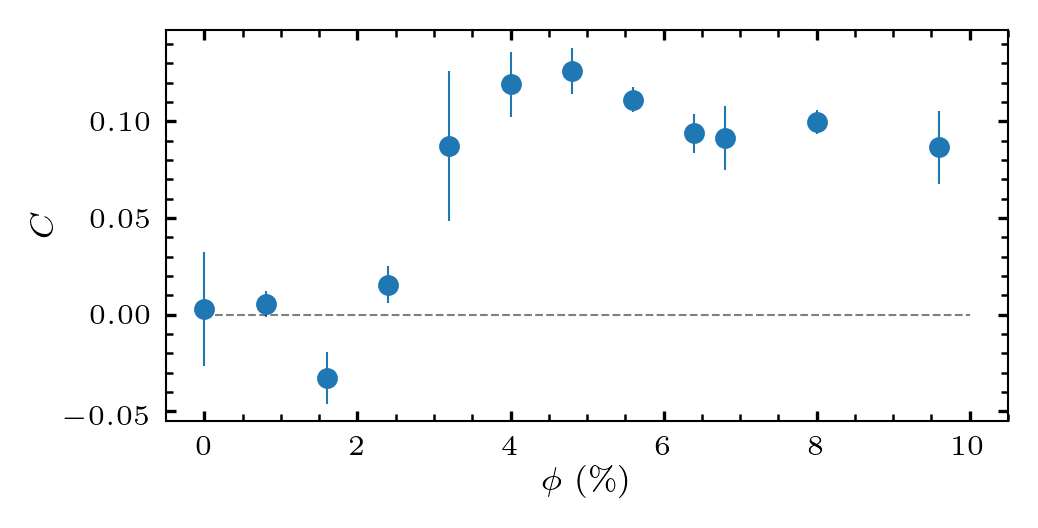

In [48]:
data = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='flow_conc_corr')

fig, ax = plt.subplots(figsize=(3.5, 1.8), dpi=300)
markers = {'energy': 'o', 'convection': '^'}
labels = {}
labels['convection'] = r'$(v\cdot\nabla c)^2$'
labels['energy'] = r'$v^2$'

for kw in markers:
    if kw != 'convection':
        ax.errorbar(data['conc'] * n0_to_vf, data[kw], yerr=data[kw+'_err'], label=labels[kw],
                ls='', marker=markers[kw], markersize=4, mew=1, lw=0.5)
    

# plt.legend(loc='right', fontsize=5)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$C$')
ax.set_yticks([-0.05, 0, 0.05, 0.1])
ax.plot([0, 10], [0, 0], ls='--', lw=0.5, alpha=0.5, color='black')

plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\C-phi.pdf'))

## 6. Dimensionality effect

Probe dimensionality effect by gradually changing the chamber thickness (200, 140, 100, <del>20</del>)

Text(0, 0.5, '$E$ [px$^2$/s$^2$]')

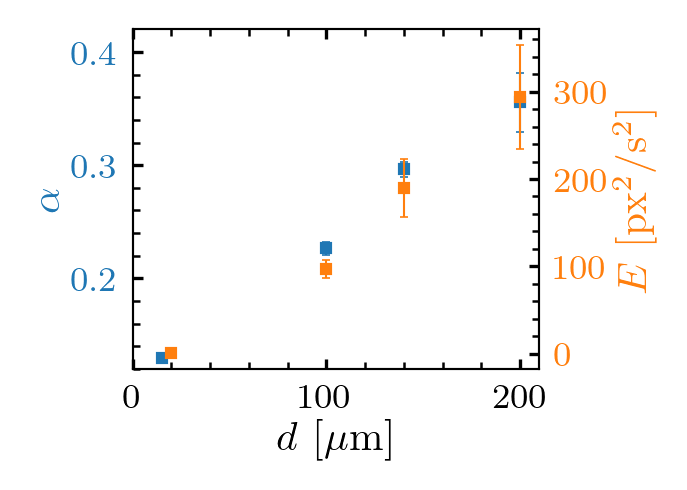

In [14]:
tm.prl('1-column-2-panel')
fig, ax = plt.subplots(dpi=300)
color = bestcolor(0)
data = pd.read_excel(os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='dimensionality')
data = data.drop([1])
ax.errorbar(data['thickness'], data['alpha_avg'], yerr=data['alpha_std'], 
            ls='', marker='s', markersize=2, lw=0.5, color=color, capsize=1, capthick=0.4)
ax.tick_params(axis='y', labelcolor=color)
ax.set_xlabel('$d$ [$\mu$m]')
ax.set_ylabel('$\\alpha$', color=color)
ax.set_ylim([0.12, 0.42])
ax.set_xlim([0, 210])
ax1 = ax.twinx()
color = bestcolor(1)
data = pd.read_excel(os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='dimensionality')
ax1.errorbar(data['thickness'], data['energy_avg'], yerr=data['energy_std'], 
             ls='', marker='s', markersize=2, lw=0.5, color=color, capsize=1, capthick=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('$E$ [px$^2$/s$^2$]', color=color)

## Figure 7: $\alpha$ as a function of $E$

This relationship has been suggested by other observations with strong enough evidence. Can we take a step forward, to ask what is the quantitative dependence? Though this dependence has been seen in many different conditions, such as different gap sizes and different concentrations, the quantitative dependece can be also different under these conditions. Thus, if I plot $\alpha$ as a function of $E$, data points obtained from the same condition set may show similar trend and relation, but data from different conditions may deviate. This potential scenerio, while posing difficulty in drawing simple conclusion, can allow us to understand it better.

#### How many data points do I have?

Each video gives me approximately 3000 frames - corresponding to 1500 velocity field data. However, the $\alpha$ data is much fewer, 3000 frames should only give 60 points. The 50 videos should in total provide 50*60=3000 data points. Let's get started with the first video: 08032020/00 

#### A function that extract and rearrange the data into two 2 columns: ('energy', 'alpha')

In [16]:
def rearrange_energy_alpha(k_data, i_data, eo_data, xlim=[1, 100], seg_length=50, fps=30):
    """
    Extract and rearrange energy and alpha data.
    
    Args:
    k_data -- kinetics data, read from df2_kinetics folder
    i_data -- image intensity data, read from overall_intensity folder
    eo_data -- energy and order parameter data, read from energy_order folder
    xlim -- range of x for alpha fitting (determined roughly by correlation length)
    seg_length -- segment length for analyzing temporal fluctuations
    fps -- frame per second of video
    
    Returns:
    ea_data -- energy and alpha data, as a DataFrame
    """
    
    data = plot_kinetics_eo(k_data, i_data, eo_data, tlim=None, xlim=xlim, lb=10, mpp=0.33, seg_length=seg_length, fps=fps, plot=False)
    new_data = kinetics_eo_from_light_on(data, plot=False)
    
    E_list = []
    for t in new_data['t0']:
        E = new_data['E'][abs(new_data['t2'] - t).argmin()]
        E_list.append(E)

    ea_data = pd.DataFrame().assign(energy=E_list, alpha=new_data['alpha'])
    
    return ea_data

In [37]:
ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
ea_data.head()

energy     alpha
0  0.478633  0.080045
1  0.559931  0.098804
2  0.496495  0.107986
3  0.417108  0.070891
4  0.442863  0.096820

#### Plot all data in a scatter plot

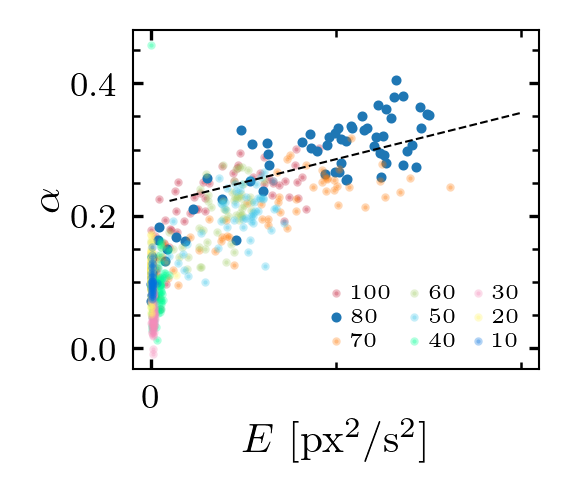

In [18]:
dirs = data_log_mapping(kw='aug')
count = 0 # used for coloring
collection = [] # collect ea data from all videos
fig, ax = plt.subplots(dpi=300)
for kw in dirs:
    if kw != '00' and kw != '85' and kw != '120':
        d = dirs[kw][0]
        date, num = d.split('-')
        folder = os.path.join(data_master_dir, r'Research projects\DF\data\level-2-data\{}'.format(date))
        n = int(num)
        eo_folder = os.path.join(folder, 'energy_order\{:02d}'.format(n))
        df_folder = os.path.join(folder, 'df2_kinetics\{:02d}'.format(n))
        i_folder = os.path.join(folder, 'overall_intensity\{:02d}'.format(n))
        eo_data = pd.read_csv(os.path.join(eo_folder, 'energy_order.csv'))
        k_data = pd.read_csv(os.path.join(df_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
        ### Highlight a concentration #################################################
        if kw == '80': 
            ax.scatter(ea_data['energy'], ea_data['alpha'], s=2, color=bestcolor(0), 
                        label=kw)
        else:
            ax.scatter(ea_data['energy'], ea_data['alpha'], s=1, color=wowcolor(count), 
                        label=kw, alpha=0.3)
        ###############################################################################
        collection.append(ea_data)
        count += 1
ax.set_xlabel('$E$ [px$^2$/s$^2$]')
ax.set_ylabel('$\\alpha$')
ax.legend(loc='lower right', ncol=3, fontsize=5)
ax.set_xticks([0, 100, 200, 300])

# linear fitting ############################
b = pd.concat(collection, axis=0)
subdata = b.loc[b.energy>20]
x = subdata.energy
y = subdata.alpha
p = np.polyfit(x, y, deg=1)
# plot fitting line #########################
x = np.array([2, 40])
y = p[0] * x + p[1]
ax.plot(x, y, ls='--', color='black', lw=0.5)

## Figure 8: energy spectrum analysis
This figure is meant to reveal the correlation between kinetic energy and GNF in every length scale. We analyze the energy spectrum of bacterial turbulence and compare it with GNF.

- (a) energy spectrum at various concentrations
- (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations
    - $\alpha$, $\beta$ vs. $\phi$
    - $\alpha$ vs. $\beta$
- (c) Energy $E$ and GNF $\Delta N/\sqrt N$ matching at all length scales
- (d) Large scale energy $E_0$ as a function of volume fractions, compare with simulation in [Bardfalvy 2019](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract)

In [76]:
def E_k(k, n, ep = 1):
    """
    Energy spectrum in active turbulence | Boltzmann Lattice simulation | reference Bardfalvy 2019
    https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract
    
    k -- wavenumber (um^-1)
    ep -- a factor describing the distance over which the regularisation acts
    
    Additional info:
    kappa = Fl / mu
    """
     # um
    l = 1.9 # um
    F = 0.32e-12 # N
    mu = 0.001e-12 # N / um^2 * s
    kappa = F * l / mu # um^3 * s
    K_2 = kn(2, k*ep)   
    
    Ek = 4 * np.pi * n * kappa**2 * (1/3 + np.cos(k*l)/(k*l)**2 - np.sin(k*l)/(k*l)**3) * ep**4 * k**2 / l**2 * K_2 ** 2
    
    return Ek

### (a) energy spectrum at various concentrations

#### plot energy spectrum data

fitting parameter: n=0.00022, ep=14.30988


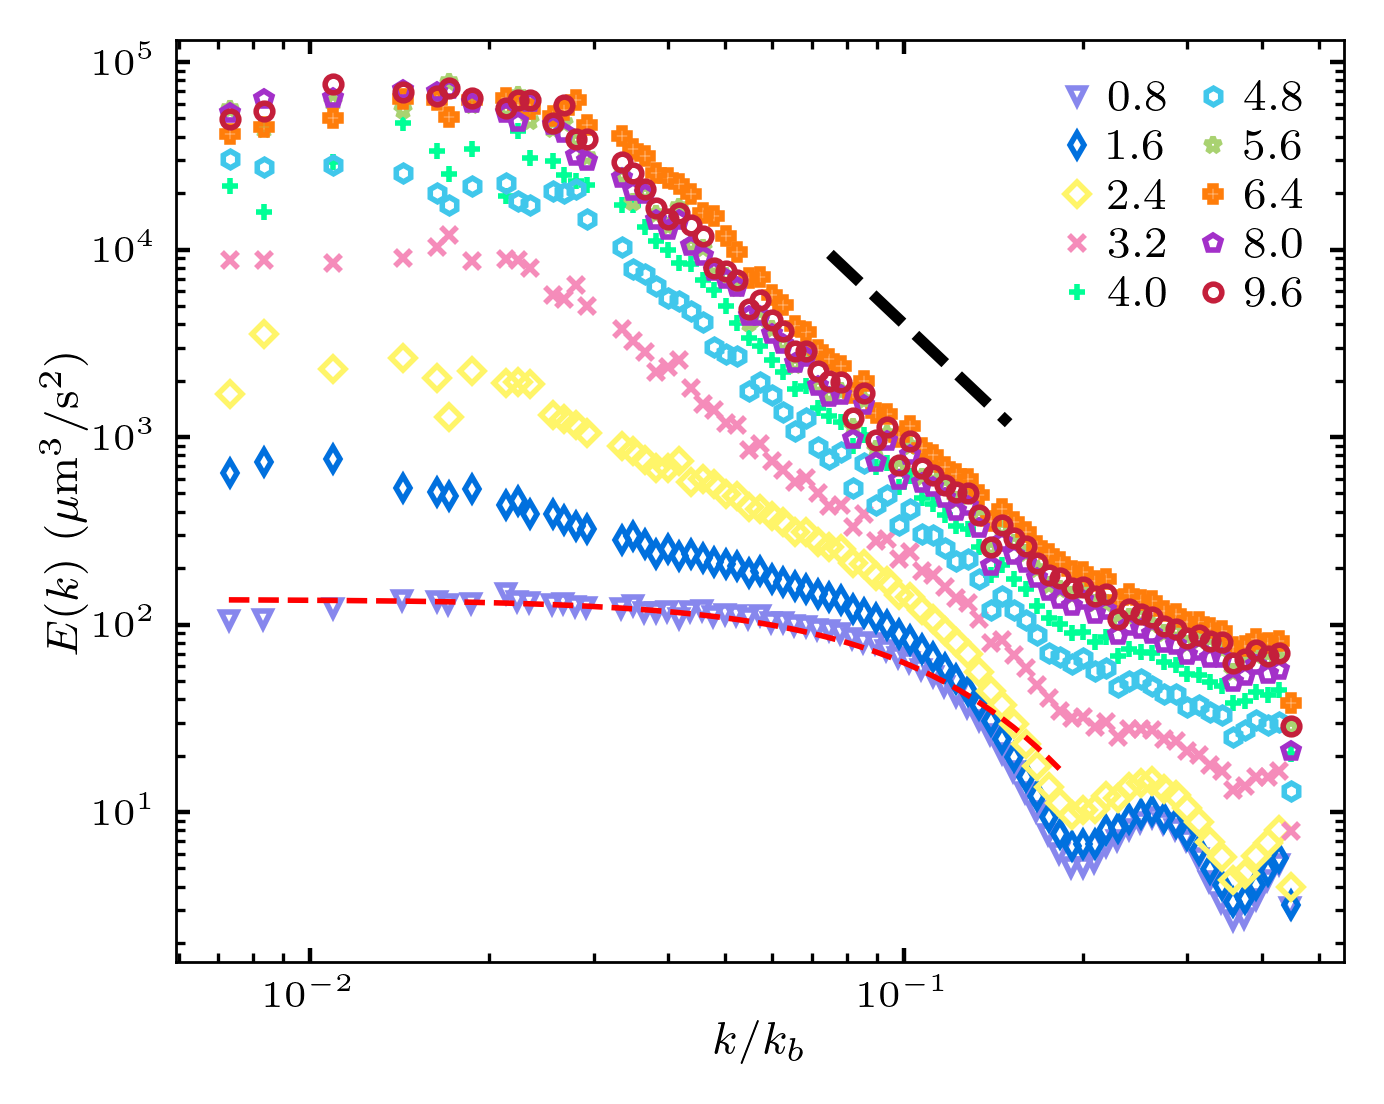

In [80]:
data_es = pd.read_csv(os.path.join(data_master_dir, 
                                   r'Research projects\DF\data\energy-spectra', 'energy-spectra.csv')).set_index('k').sort_index()
k_max = 0.15 * 2 * np.pi# set the maximal k up to which we plot the data (um^-1)
data_es = data_es[data_es.keys().astype('int').sort_values().astype('str')]
data_es_trim = data_es[:k_max]
kb = 2 * np.pi / 3
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for str_c in data_es_trim:
    if str_c != '85':
        ax.plot(data_es_trim.index/kb, data_es_trim[str_c], label='{:.1f}'.format(int(str_c)*n0_to_vf), ls='', 
                marker=marker_list[color_dict[str_c]], markersize=3, mew=1,
                mec=wowcolor(color_dict[str_c]), mfc=(0,0,0,0))
        
ax.legend(loc='upper right', ncol=2, fontsize=8)
ax.loglog()
ax.set_xlabel('$k/k_b$')
ax.set_ylabel('$E(k)$  ($\mu$m$^3$/s$^2$)')

fitting_max = 0.4 # set the range for fitting
data_fit = data_es[:fitting_max]['10'].dropna()
popt, pcov = curve_fit(E_k, data_fit.index/kb, data_fit)
ax.plot(data_fit.index/kb, E_k(data_fit.index/kb, *popt), ls='--', color='red', lw=1, label='fitting')
print('fitting parameter: n={0:.5f}, ep={1:.5f}'.format(*popt))

# set y_lim for inset
# ax.set_ylim([5e-3, 2e3])

x = np.array([0.05, 0.1]) * 1.5
y = 4 * x ** -3
ax.plot(x, y, ls='--', lw=2, color='black')

plt.tight_layout()
fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\energy-spectrum\energy-spectrum.pdf'))

### (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations

#### make beta data

In [24]:
# fitting range | data file
# 0.02 - 0.05   | beta.csv
# 0.01 - 0.04   | beta1.csv
es_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy_spectra.csv')).set_index('k')
expo = []
for kw in es_data:
    x = es_data.index
    y = es_data[kw]
    ind = (x>=0.01) & (x<=0.04)
    p = np.polyfit(np.log(1/x[ind]), np.log(y[ind]), deg=1)
    expo.append(p[0])
beta_data = pd.DataFrame({'conc': es_data.keys(), 'beta': expo}).set_index('conc')
# beta_data.to_csv(os.path.join(data_master_dir, r'Research projects\DF\data\beta1.csv'))

#### Variation 1: function of concentration

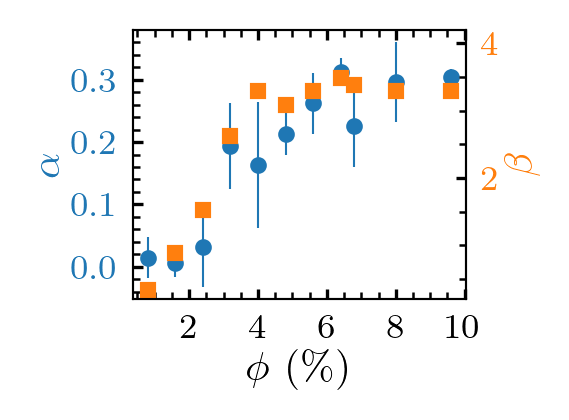

In [105]:
# load data and plot
fig, ax = plt.subplots(figsize=(2, 1.5), dpi=300)
# alpha = pd.read_excel(io=os.path.join(data_master_dir, r'Research projects\DF\data\new_data_summary.xlsx'), sheet_name='df2')
alpha = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\GNF\alpha.csv'))
beta = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy-spectra\beta.csv'))
color = bestcolor(0)
ax.errorbar(alpha['conc']*0.08, alpha['avg'], yerr=alpha['std'], ls='', elinewidth=0.5, marker='o', markersize=3, color=color)
# ax.set_xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$', color=color)
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.tick_params(axis='y', labelcolor=color)
ax1 = ax.twinx()
color = bestcolor(1)
ax1.errorbar(beta['conc']*0.08, beta['beta'], ls='', elinewidth=0.5, marker='s', markersize=3, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('$\\beta$', color=color)
ax1.set_ylim([0.2, 4.2])
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\alpha-beta-phi.pdf'))

#### variation 2: $\alpha$ as a function of $\beta$

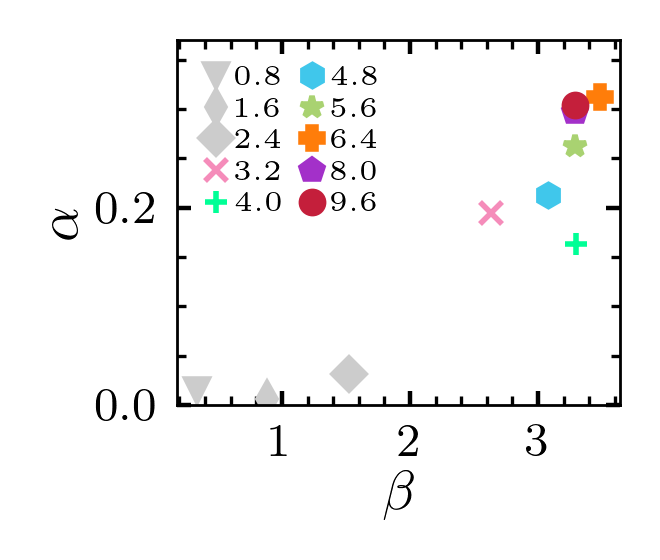

In [113]:
# alpha_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\GNF\alpha.csv')).set_index('conc').drop(index=85)
# beta_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy-spectra\beta.csv')).set_index('conc').drop(index=85)
fig, ax = plt.subplots()
alpha = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\GNF\alpha.csv')).set_index('conc').drop(85)
beta = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy-spectra\beta.csv')).set_index('conc')
# fig, ax = plt.subplots(figsize=(3.5, 1.6))
for c in alpha.index:
    if c < 40:
        ax.plot(beta['beta'][c], alpha['avg'][c], ls='', marker=marker_list[color_dict[str(c)]], 
                markersize=4, color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*0.08))
    else:
        ax.plot(beta['beta'][c], alpha['avg'][c], ls='', marker=marker_list[color_dict[str(c)]], 
                markersize=4, color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*0.08))
ax.set_ylim([0, 0.37])
ax.legend(loc='upper left', ncol=2, fontsize=5)
ax.set_xlabel('$\\beta$')
ax.set_ylabel('$\\alpha$')
plt.tight_layout()
# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\alpha-beta.pdf'))

In [195]:
ratio = (alpha['avg'] / beta['beta']).to_frame()

In [200]:
ratio.loc[ratio.index>50].std()

0    0.009707
dtype: float64

#### Variation 3: $\beta$ as a function of $\phi$

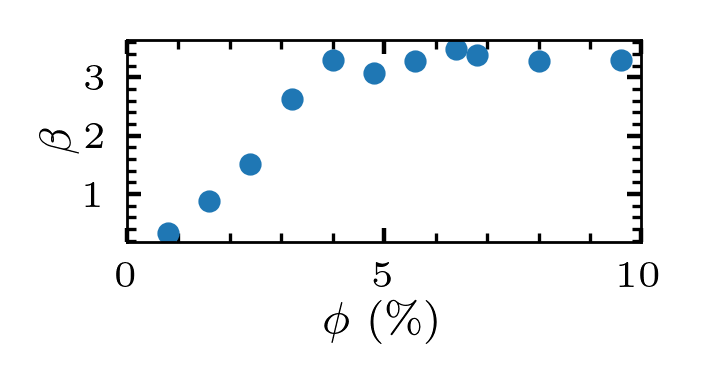

In [30]:
beta = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy-spectra\beta.csv'))
fig, ax = plt.subplots(figsize=(1.8, 1.0))
ax.plot(beta.conc*n0_to_vf, beta.beta,
        ls='', marker='o', markersize=3)
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\beta$')
ax.set_xlim([0, 10])
ax.set_xticks([0, 5, 10])
plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\energy-spectrum\beta-phi-small.pdf'))

In [179]:
beta[4:].beta.std()

0.12175323171671436

### (c) Energy $E$ and GNF $\Delta N/\sqrt N$ matching at all length scales

#### Variation 1: steady state

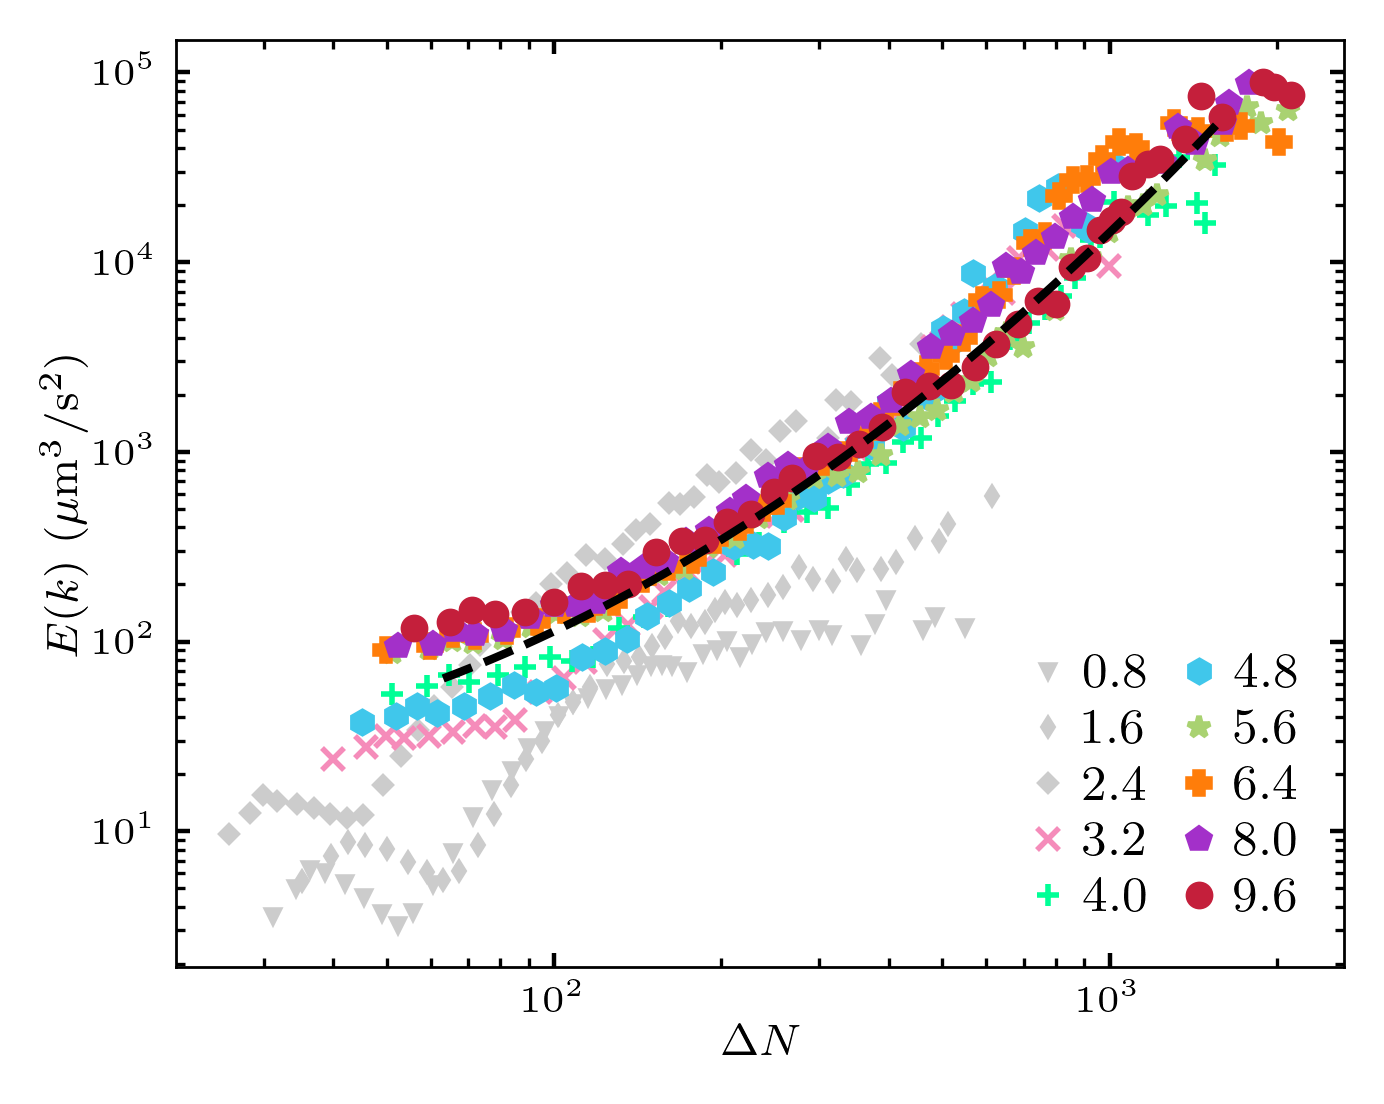

In [10]:
conc, folders, sample_num = tentative_log()
gnf_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\df2_kinetics\{1:02d}\nGNF_data.csv')
es_master_file = os.path.join(data_master_dir, 
                               r'Research projects\DF\data\transient-GNF-energy-dN\{0}\energy_spectra\{1:02d}\energy_spectra.csv')
bounds = [10, 3000]

fig, ax = plt.subplots(figsize=(3.5, 2.8))
for c, f, sn in zip(conc[::-1], folders[::-1], sample_num[::-1]):
    n = sn[2]
    gnf_data = pd.read_csv(gnf_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    es_data = pd.read_csv(es_master_file.format(f, n)).set_index('l_r')[bounds[0]: bounds[1]]
    gnf_plot = gnf_data.drop(labels=gnf_data.keys()[:-10], axis=1).mean(axis=1)
    es_plot = es_data.drop(labels=es_data.keys()[:-10], axis=1).mean(axis=1)
    if c > 30 and c != 85:
        ax.plot(gnf_plot, es_plot, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=4, 
                color=wowcolor(color_dict[str(c)]), label='{:.1f}'.format(c*n0_to_vf))
    elif c <= 30:
        ax.plot(gnf_plot, es_plot, 
                ls='', marker=marker_list[color_dict[str(c)]], markersize=2, 
                color=(0.8, 0.8, 0.8), label='{:.1f}'.format(c*n0_to_vf))
ax.loglog()
ax.legend(ncol=2, loc='lower right', fontsize=9)
ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$E(k)$  ($\mu$m$^3$/s$^2$)')
plt.tight_layout()

# fitting curve
p = np.array([ 0.30918824, -1.45846505,  4.89021747])
x = np.logspace(1.8, 3.2)
logx = np.log(x)
y = np.exp(p[0]*logx**2 + p[1]*logx + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-steady-dN.pdf'))

#### Variation 2: transient state

In [13]:
data_master = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-small\{1}\{0}\{2:02d}\{3}')
df_flag = 'df2_kinetics'
es_flag = 'energy_spectra'
df_file = 'nGNF_data.csv'
es_file = 'energy_spectra.csv'

df = {}
es = {}
conc, folders, sample_num = tentative_log()
for date, r, c in zip(folders, sample_num, conc):
    n = r[1]
    df[str(c)] = pd.read_csv(data_master.format(df_flag, date, n, df_file)).set_index('l_r')
    es[str(c)] = pd.read_csv(data_master.format(es_flag, date, n, es_file)).set_index('l_r').sort_index()

Text(59.37854370438113, 0.5, '$E$ ($\\mu$m$^3$/s$^2$)')

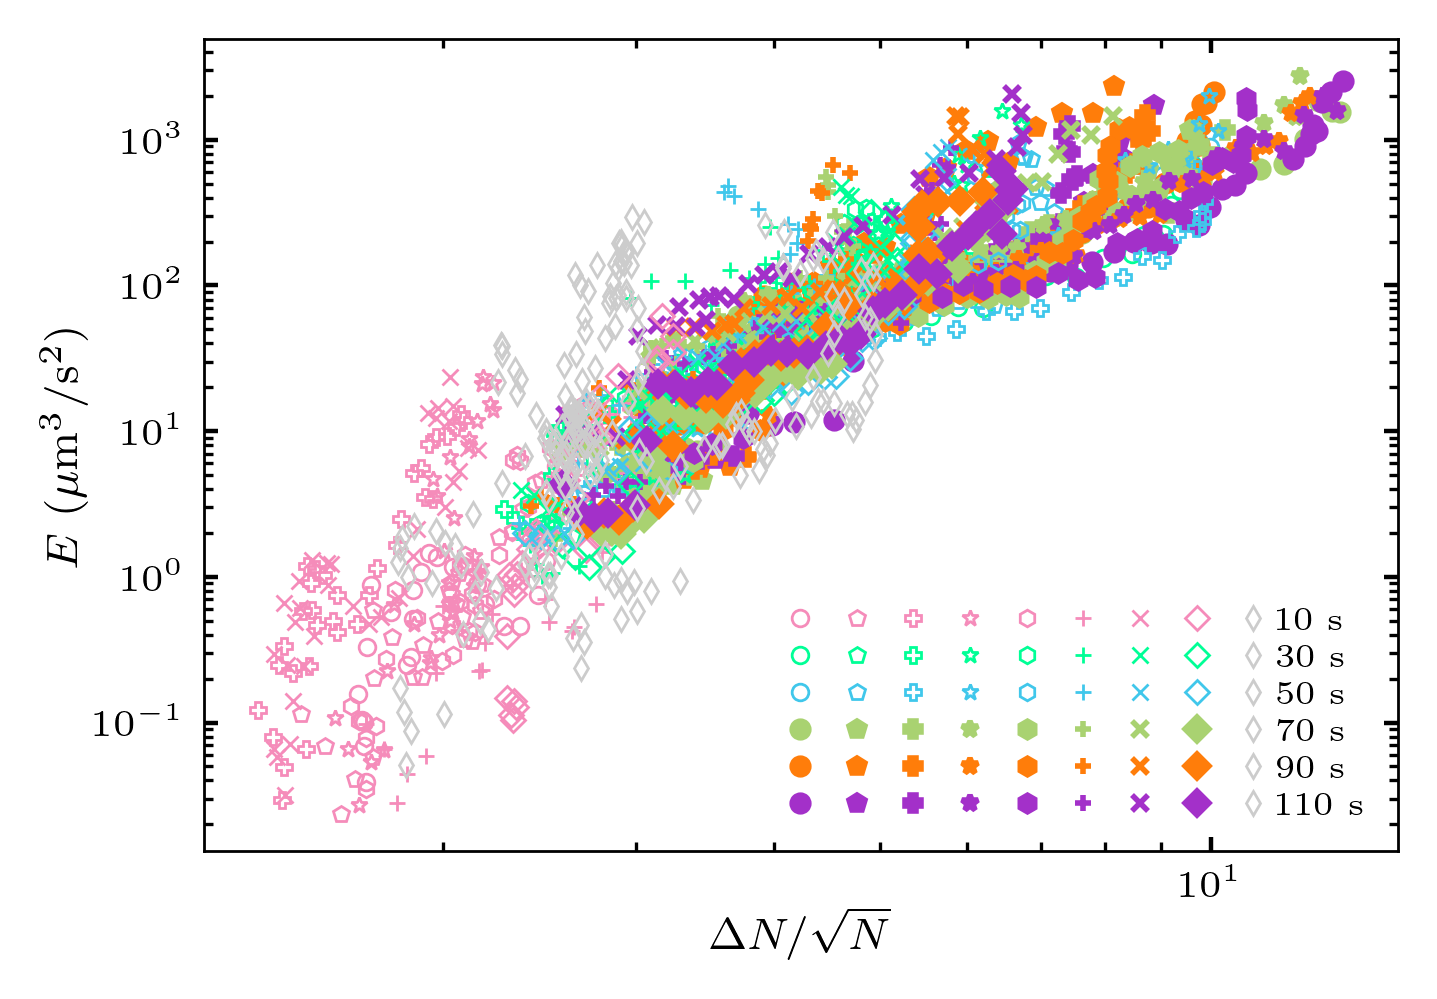

In [15]:
bounds = [0, 200]
fig, ax = plt.subplots(figsize=(3.5, 2.4))
for sample_n, kw in enumerate(df):
    if int(kw) > 30:
        for num, t in enumerate(range(300, 3500, 600)):
            if t < 2000:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[sample_n], markersize=3, mfc=(0,0,0,0),
                        mew=0.5, mec=wowcolor(6-num), ls='', label=' ')
            else:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[sample_n], markersize=3, ls='', 
                        label=' ', color=wowcolor(6-num))
    elif int(kw) == 30:
        for num, t in enumerate(range(300, 3500, 600)):
            ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[sample_n], markersize=3, mfc=(0,0,0,0),
                    mew=0.5, mec=(0.8, 0.8, 0.8), ls='', label='{0:d} s'.format(int(t/30)))
ax.legend(loc='lower right', fontsize=6, ncol=9)
ax.loglog()
plt.tight_layout()
ax.set_xlabel('$\Delta N / \sqrt N$')
ax.set_ylabel('$E$ ($\mu$m$^3$/s$^2$)')

# ax.set_xlim([1.5e-1, 7e-1])
# ax.set_ylim([1e-5, 5e0])

# fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation\E-GNF-transient.pdf'))

#### Variation 3: transient state, different color scheme (concentration-color, time-marker)

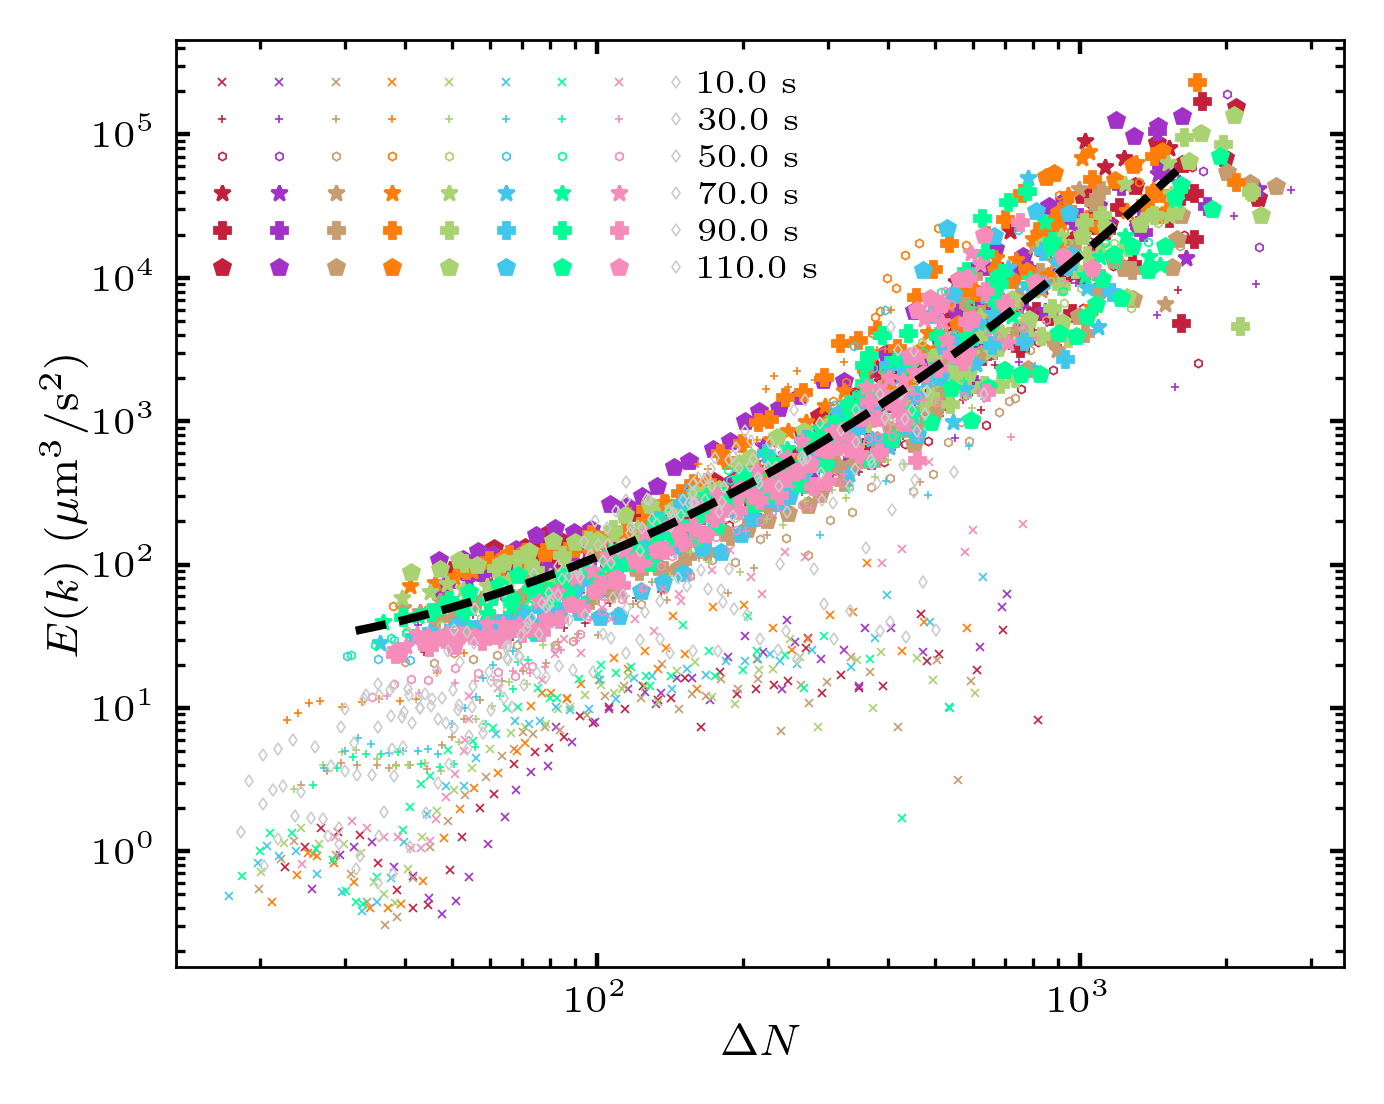

In [22]:
data_master = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-dN\{1}\{0}\{2:02d}\{3}')
df_flag = 'df2_kinetics'
es_flag = 'energy_spectra'
df_file = 'nGNF_data.csv'
es_file = 'energy_spectra.csv'

df = {}
es = {}
conc, folders, sample_num = tentative_log()
for date, r, c in zip(folders, sample_num, conc):
    n = r[2]
    df[str(c)] = pd.read_csv(data_master.format(df_flag, date, n, df_file)).set_index('l_r')
    es[str(c)] = pd.read_csv(data_master.format(es_flag, date, n, es_file)).set_index('l_r').sort_index()
    
bounds = [10, 3000]
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for sample_n, kw in enumerate(df):
    if int(kw) > 30:
        for num, t in enumerate(range(300, 3500, 600)):
            if t < 2000:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[6-num], markersize=1.5, mfc=(0,0,0,0),
                        mew=0.3, mec=wowcolor(color_dict[kw]), ls='', label=' ')
            else:
                ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[6-num], markersize=3, ls='', 
                        mew=0.5, label=' ', color=wowcolor(color_dict[kw]))
    elif int(kw) == 30:
        for num, t in enumerate(range(300, 3500, 600)):
            ax.plot(df[kw][str(t)][bounds[0]: bounds[1]], es[kw][str(t)][bounds[0]: bounds[1]], marker=marker_list[sample_n], markersize=1.5, mfc=(0,0,0,0),
                    mew=0.3, mec=(0.8, 0.8, 0.8), ls='', label='{:.1f} s'.format(t/30))
ax.legend(loc='upper left', fontsize=6, ncol=9)
ax.loglog()

ax.set_xlabel('$\Delta N$')
ax.set_ylabel('$E(k)$  ($\mu$m$^3$/s$^2$)')

# ax.set_xlim([1, 16])
# ax.set_ylim([1e-5, 5e0])

# fitting curve
p = np.array([ 0.30918824, -1.45846505,  4.89021747])
x = np.logspace(1.5, 3.2)
logx = np.log(x)
y = np.exp(p[0]*logx**2 + p[1]*logx + p[2])
ax.plot(x, y, ls='--', lw=1.5, color='black')

plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation-transient\E-GNF-transient-dN.pdf'))

### (d) energy density at the limit k -> 0 (compare with simulation in [Bardfalvy 2019](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract))

In [4]:
def E0_prediction(n):
    """
    Low k prediction of energy density at various number density 
    (cells/um^3, since we assume e. coli volume is 1 um^3, this value coincides with the volume fraction)
    """
    l = 1.9 # um
    F = 0.21e-12 # N, modified from 0.42 to 0.21, to account for the lower velocity of our light-powered E. coli
    mu = 0.001e-12 # N / um^2
    kappa = F * l / mu # um^3
    
    E0 = 8 * np.pi / 15 * n * kappa ** 2
    
    return E0

[]

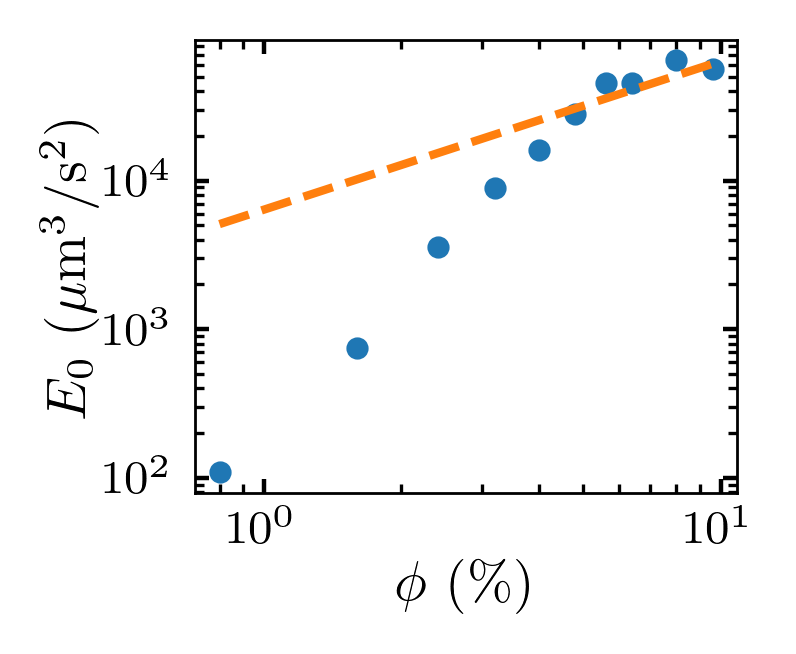

In [6]:
es_data = pd.read_csv(os.path.join(data_master_dir, r'Research projects\DF\data\energy_spectra-1.csv')).set_index('k')
# plot k->0 limit E
fig, ax = plt.subplots()
n = es_data.keys().astype('int')*0.08
ax.plot(n, es_data.iloc[0]*2*np.pi, ls='', marker='o', markersize=3)
# plt.xlabel('$n$ (n$_0$)')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$E_0$ ($\mu$m$^3$/s$^2$)')
plt.plot(n, E0_prediction(n * 0.01) * (17/11)**2, ls='--')
plt.loglog()

### (e) Energy spectra evolution

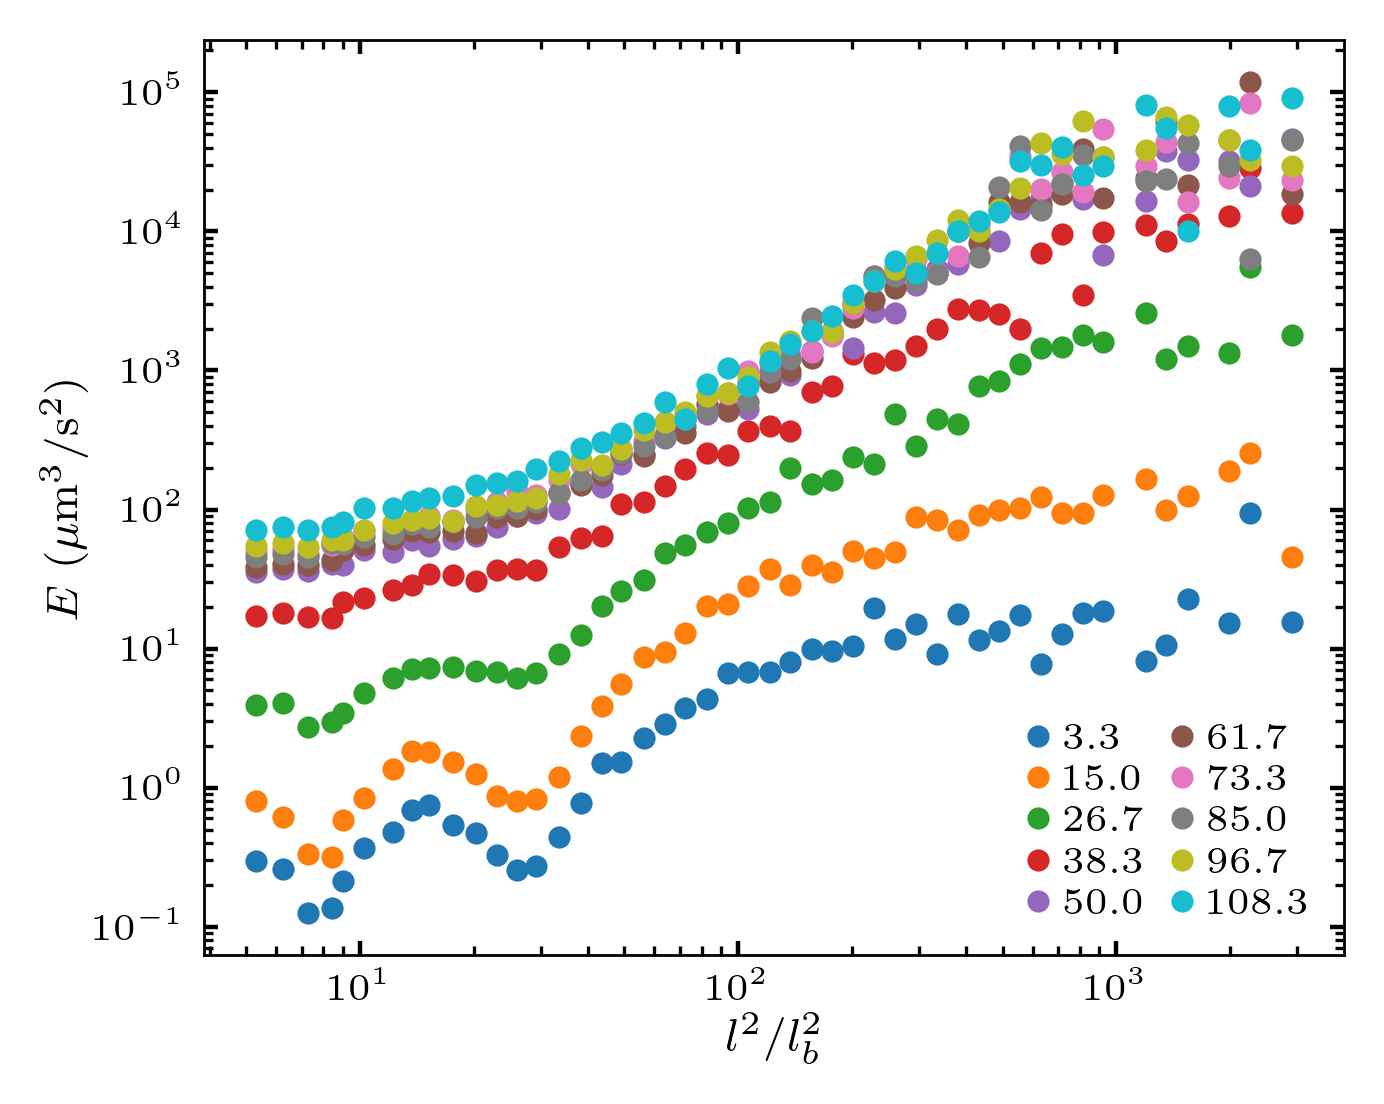

In [51]:
folder = os.path.join(data_master_dir, r'Research projects\DF\data\transient-GNF-energy-small\08032020\energy_spectra\02')
master = pd.read_csv(os.path.join(folder, r'energy_spectra.csv')).set_index('l_r')[5:]

selected_frames = master.keys()[2:len(master.keys()):7]
fig, ax = plt.subplots(figsize=(3.5, 2.8))
for frame in selected_frames:
    ax.plot(master.index, master[frame], 
            label='{:.1f}'.format(int(frame)/30), ls='', marker='o', markersize=3)
ax.legend(ncol=2, loc='lower right')
ax.loglog()
ax.set_xlabel('$l^2/l_b^2$')
ax.set_ylabel('$E$ ($\mu$m$^3$/s$^2$)')
plt.tight_layout()

fig.savefig(os.path.join(data_master_dir, r'Research projects\DF\Figures\GNF-energy-correlation-transient\energy-spectra-evolution.pdf'))